# Laptop Price Prediction Project

### Step 1. Loading the data

In [59]:
# Importing essential libraries for data analysis and machine learning

# Basic libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For generating all combinations of features (if needed)
from itertools import combinations

# Encoding categorical features and applying Box-Cox transformation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

# For feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For splitting dataset into training and test sets
from sklearn.model_selection import train_test_split

# Machine Learning models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Randomized Search for faster hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [3]:
# Loading the dataset from a CSV file into a Pandas DataFrame
data = pd.read_csv('laptop_prices.csv')

### Step 2. Exploring the data

In [4]:
# Displaying the first 5 rows of the dataset to get an initial overview
data.head(5)

Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageType  SecondaryStorageType  \
0            128                 0                SSD                    No   
1            128                 0      Flash Storage                    No   
2            256                 0                SSD                    No   
3            512                 0                SSD                    No   
4            256                 0                SSD                    No   

   GPU_company               GPU_model  
0        Intel  Iris Plus Graphics 640  
1        Intel        HD Graphics 6000  
2        Intel         HD Graphics 620  
3          AMD          Radeon Pro 455  
4        Intel  Iris Plus Graphics 650  

[5 rows x 23 columns]

In [5]:
# Displaying all the column names in the dataset
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [6]:
# Displaying the shape of the dtaset
data.shape

(1275, 23)

In [7]:
# Getting a summary of the dataset structure, data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [8]:
# Generating summary statistics for numerical columns in the dataset
data.describe()

Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.000000          0.000000  
25%    1080.000000     2.000000      256.000000          0.000000  
50%    1080.000000     2.500000      256.000000          0.000000  
75%    1080.000000     2.700000      512.000000          0.000000  
max    2160.000000     3.600000     2048.000000       2048.000000

In [9]:
# Checking the number of missing (null) values in each column of the dataset
data.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [10]:
# Checking the number of duplicate rows in the dataset
data.duplicated().sum()

0

In [11]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

In [12]:
# Calculate IQR (Interquartile Range) for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each numerical column
outlier_counts = outliers.sum()

# Display rows with outliers
print("Count of Outliers:")
outlier_counts

Count of Outliers:


Inches               37
Ram                 219
Weight               45
Price_euros          28
ScreenW             437
ScreenH             442
CPU_freq              2
PrimaryStorage      256
SecondaryStorage    208
dtype: int64

In [13]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [14]:
# Check unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("-" * 50)

Unique values in 'Company':
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
--------------------------------------------------
Unique values in 'Product':
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/

In [15]:
# Loop through each categorical column and standardize the values
for col in categorical_columns:
    # Remove leading/trailing spaces and convert to lowercase
    data[col] = data[col].str.strip().str.lower()

# Print out the unique values in each standardized categorical column
for col in categorical_columns:
    print(f"Unique values in {col} column after standardization:")
    print(data[col].value_counts())

Unique values in Company column after standardization:
Company
dell         291
lenovo       289
hp           268
asus         152
acer         101
msi           54
toshiba       48
apple         21
samsung        9
razer          7
mediacom       7
microsoft      6
xiaomi         4
vero           4
chuwi          3
google         3
fujitsu        3
lg             3
huawei         2
Name: count, dtype: int64
Unique values in Product column after standardization:
Product
xps 13                                 30
inspiron 3567                          25
probook 450                            22
250 g6                                 21
legion y520-15ikbn                     19
                                       ..
ideapad 520-15ikbr                      1
thinkpad x260                           1
rog g752vl-uh71t                        1
portege x30-d-10l                       1
x553sa-xx031t (n3050/4gb/500gb/w10)     1
Name: count, Length: 576, dtype: int64
Unique values in TypeNam

## Step 3. Cleaning the Data

#### Fixing Outliers

## Step 4. Cleaning the Data

### 4.1. Univariate Analysis

#### 4.1.1. Analyzing numerical columns with Histplot and Boxplot

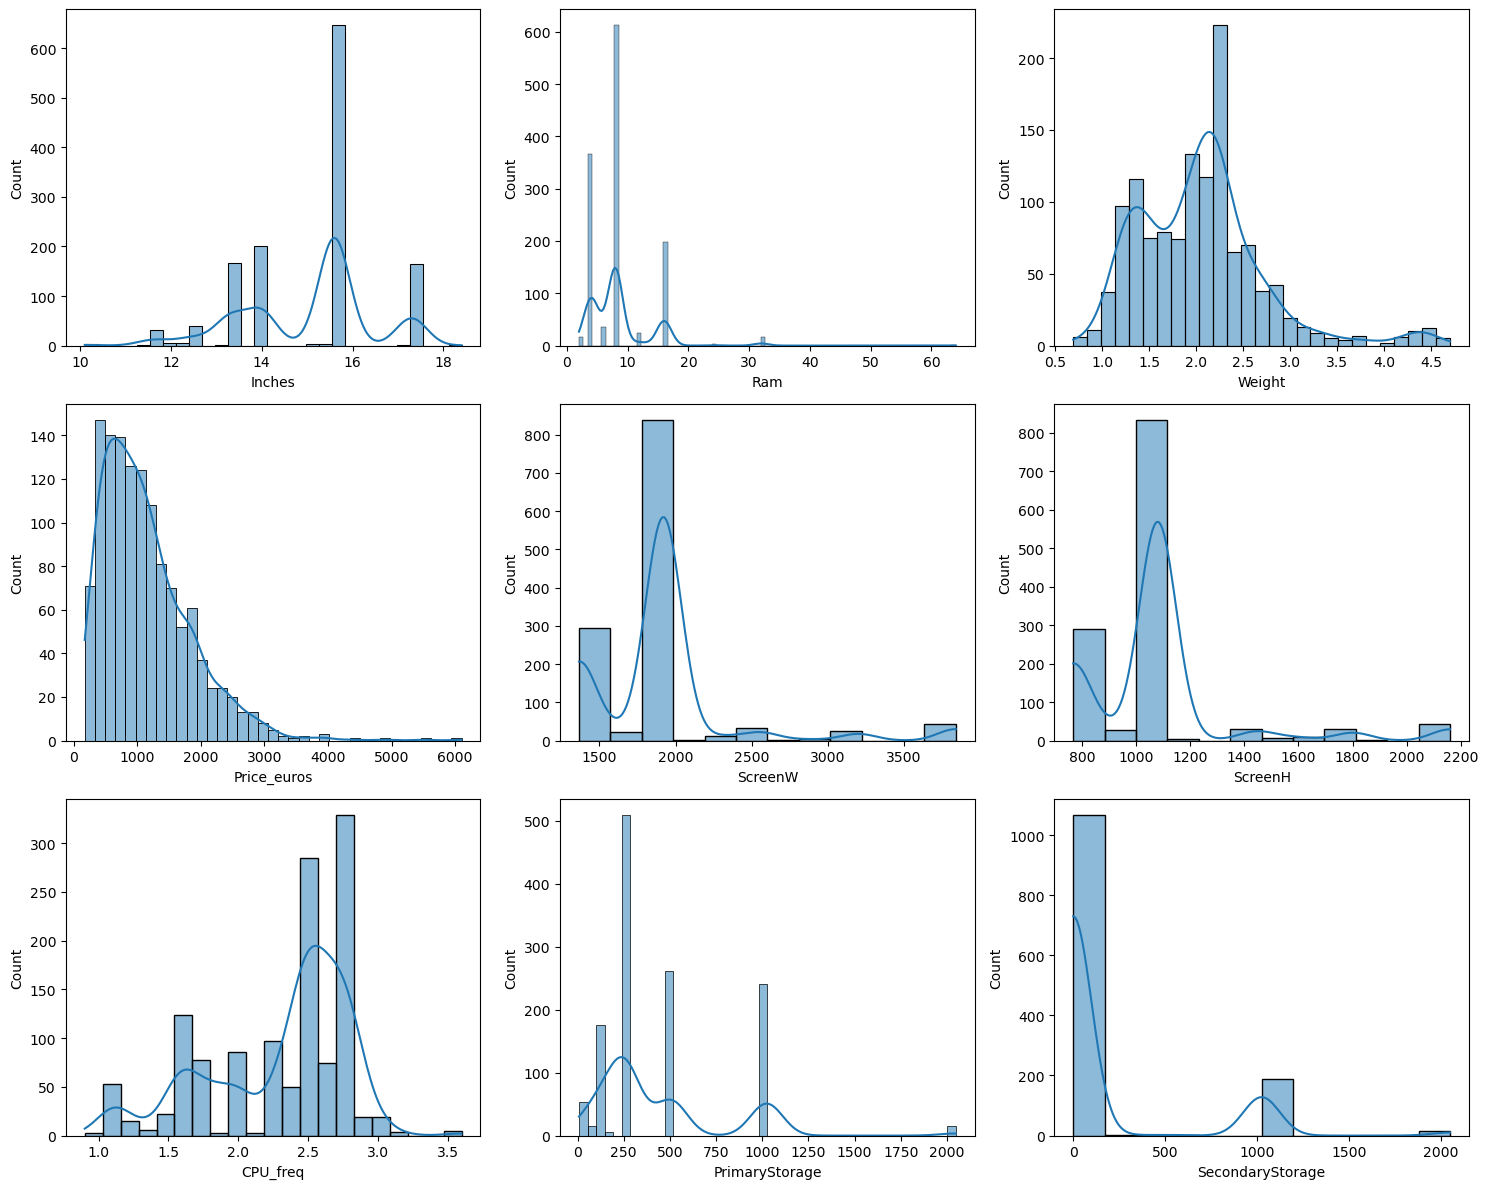

In [16]:
# Set up the 3x3 grid for plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Loop through numerical columns and plot
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i // 3, i % 3])
    # axes[i].title(f"Distribution of {col}")
    # axes[i].xlabel(col)
    # axes[i].ylabel("Frequency")

plt.tight_layout()  # Adjust layout
plt.show()

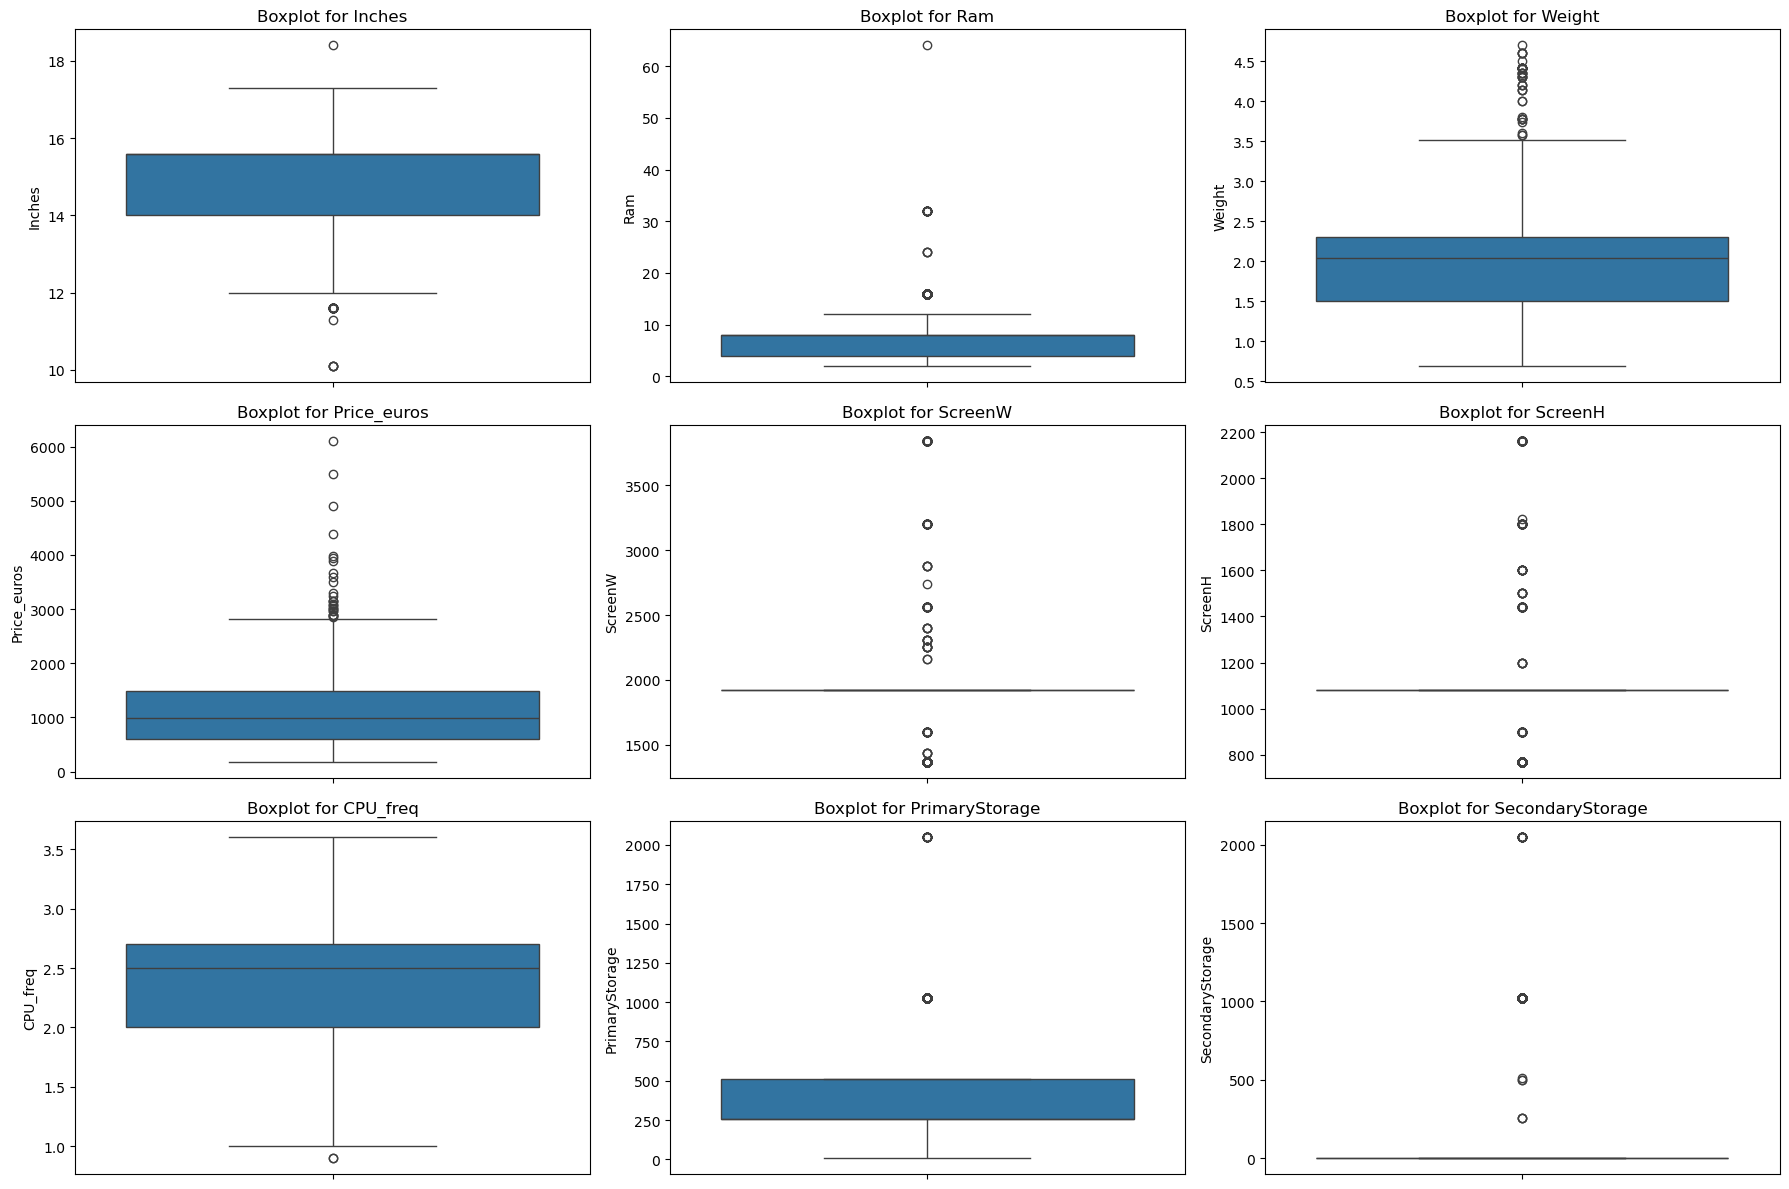

In [17]:
# Set up the figure for 2 rows and 3 columns
plt.figure(figsize=(18, 12))

# Loop through each numerical column and plot boxplots in a grid layout
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)  # Creates a subplot in a 2x3 grid (2 rows, 3 columns)
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")

# Adjust layout and display all boxplots
plt.tight_layout()
plt.show()

# Handling outliers using IQR
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data_no_outliers = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### 4.1.2. Analyzing categorical columns

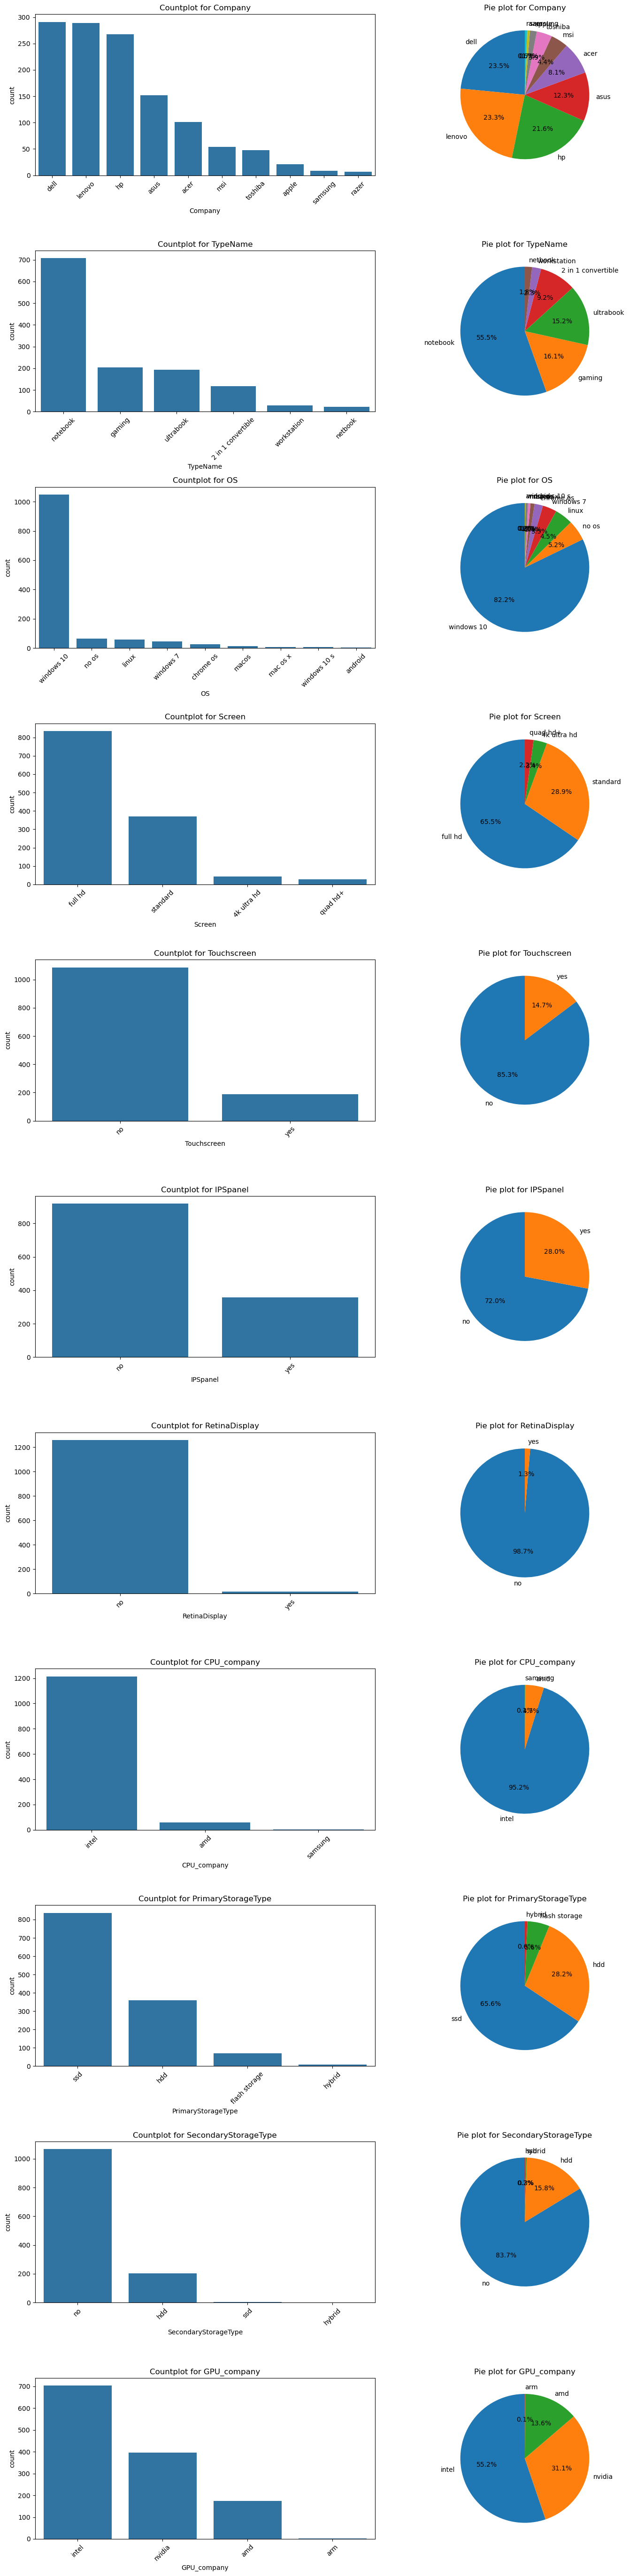

In [18]:
# List of categorical columns
categorical_columns = ['Company', 'TypeName', 'OS', 'Screen', 'Touchscreen',
                       'IPSpanel', 'RetinaDisplay', 'CPU_company',
                       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']

# Set up the plotting grid (2 rows, multiple columns for each categorical variable)
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(15, 5 * len(categorical_columns)))

# Loop through each column for visualization
for i, col in enumerate(categorical_columns):
    # Top 10 values for countplot
    top_10_values = data[col].value_counts().nlargest(10)
    
    # Countplot
    sns.countplot(data=data, x=col, order=top_10_values.index, ax=axes[i, 0])
    axes[i, 0].set_title(f"Countplot for {col}")
    axes[i, 0].tick_params(axis ='x', rotation=45)
    
    # Pie plot
    axes[i, 1].pie(top_10_values, labels=top_10_values.index, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f"Pie plot for {col}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### 4.2 Bivariate Analysis

#### 4.2.1. Analyzing the numerical columns with correlation matrix

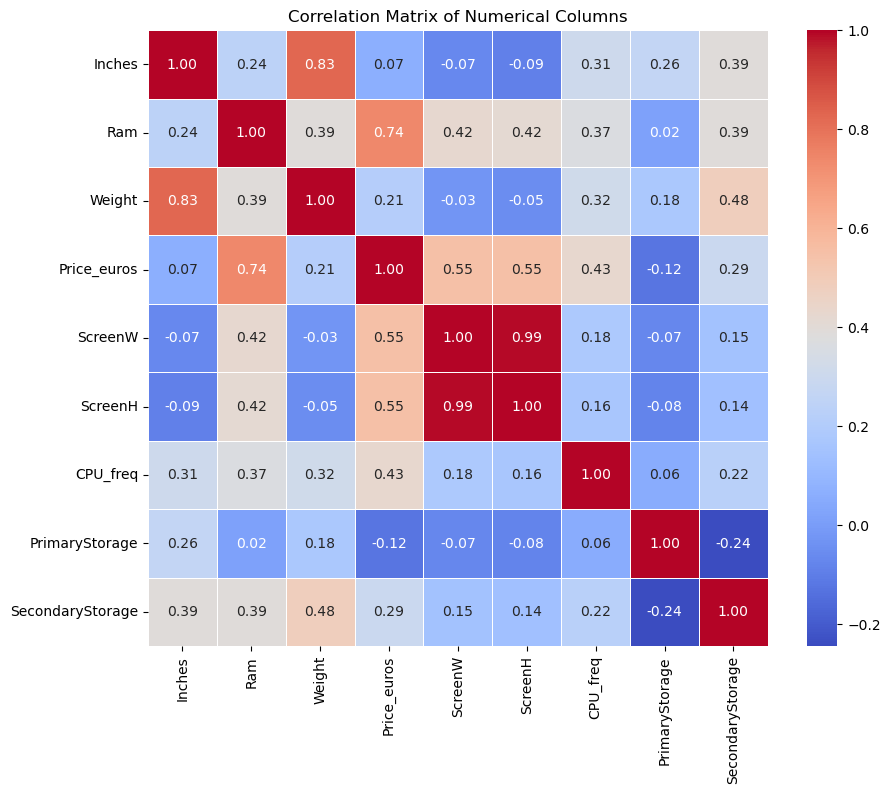

In [19]:
# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

#### 4.2.2. Analyzing the relation between numerical columns with scatter plot

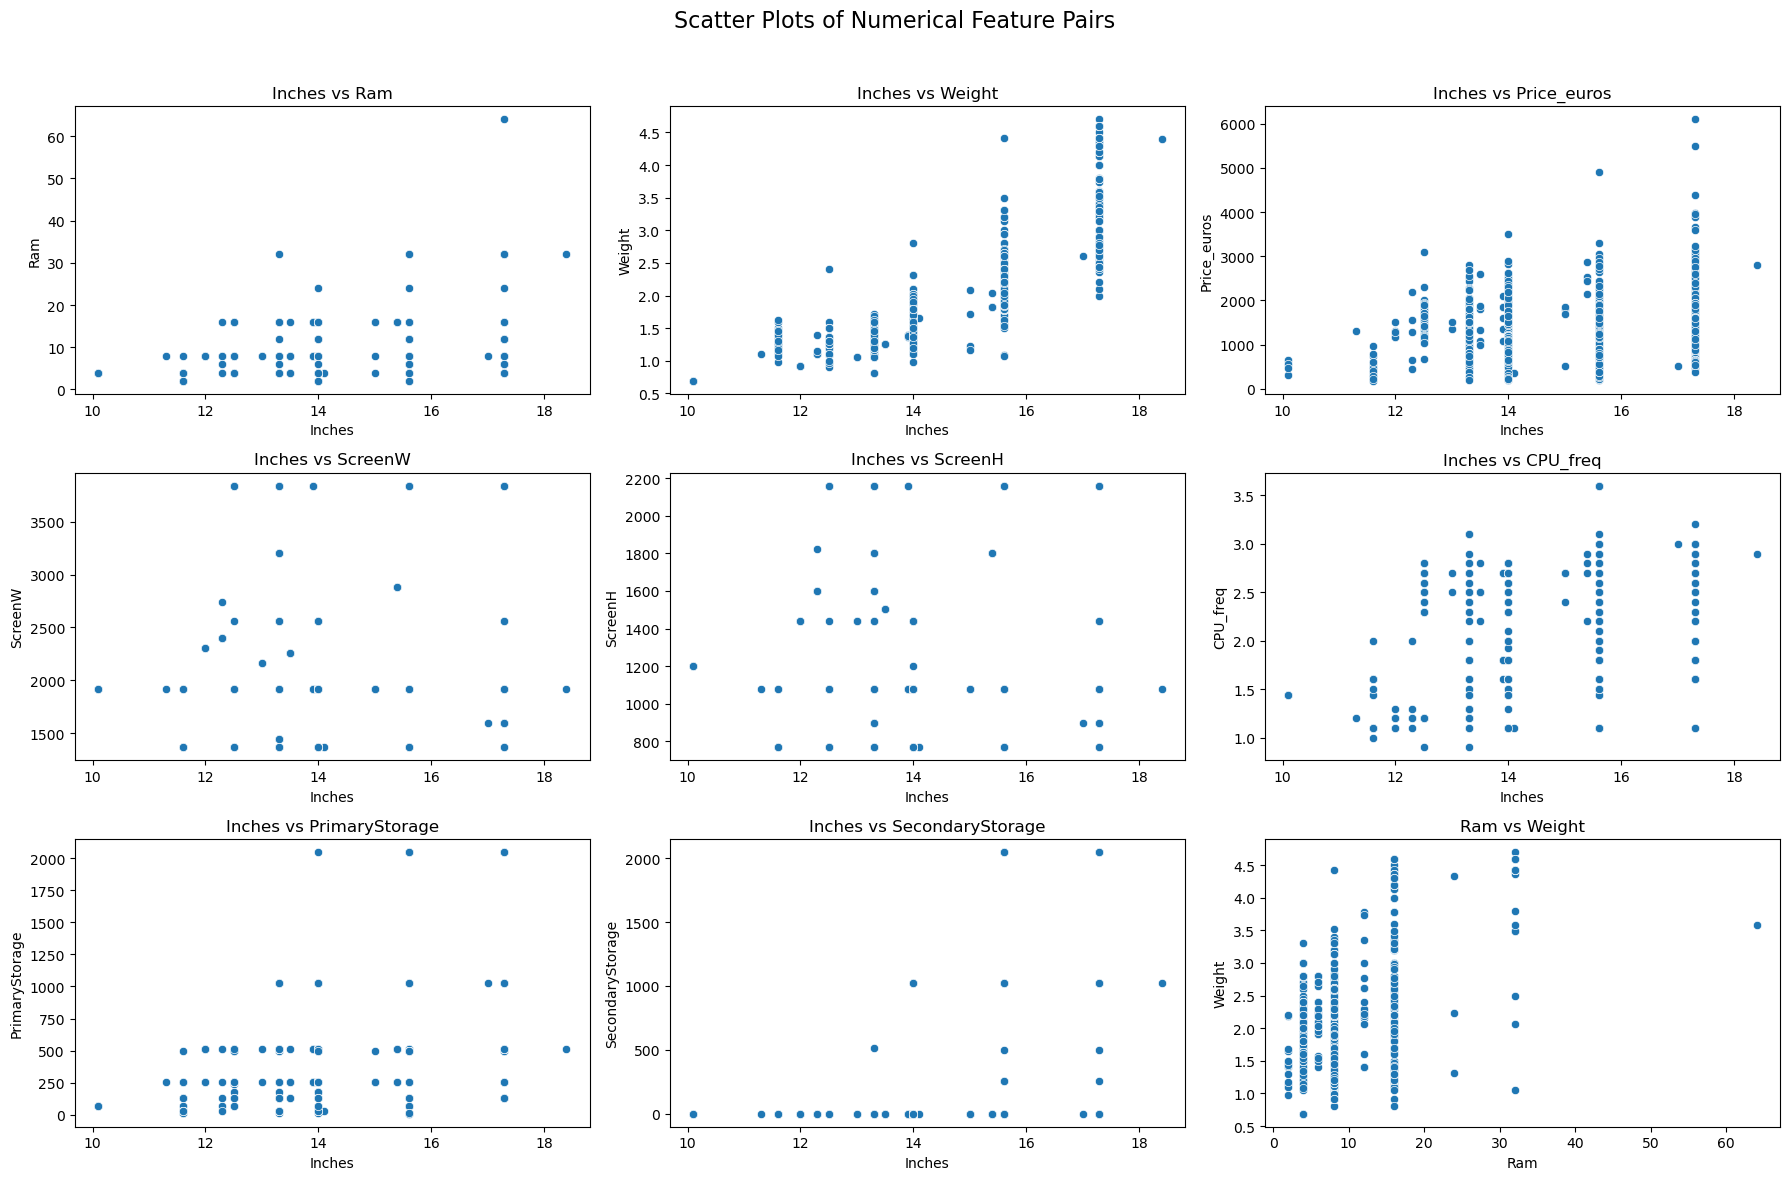

In [20]:
# Generate all combinations of pairs (you can limit to top 9 for clarity)
pairs = list(combinations(numerical_columns, 2))[:9]  # Only first 9 combinations

# Plot 3x3 scatter plots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Scatter Plots of Numerical Feature Pairs", fontsize=16)

for i, (x, y) in enumerate(pairs):
    row, col = divmod(i, 3)
    sns.scatterplot(data=data, x=x, y=y, ax=axes[row, col])
    axes[row, col].set_title(f'{x} vs {y}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 4.2.3. Analyzing the relation between categorical and numerical variables with boxplot

In [21]:
# List of categorical and numerical columns
categorical_columns = ['Company', 'TypeName', 'OS', 'Screen', 'Touchscreen',
                       'IPSpanel', 'RetinaDisplay', 'CPU_company',
                       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']

numerical_columns = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
                     'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

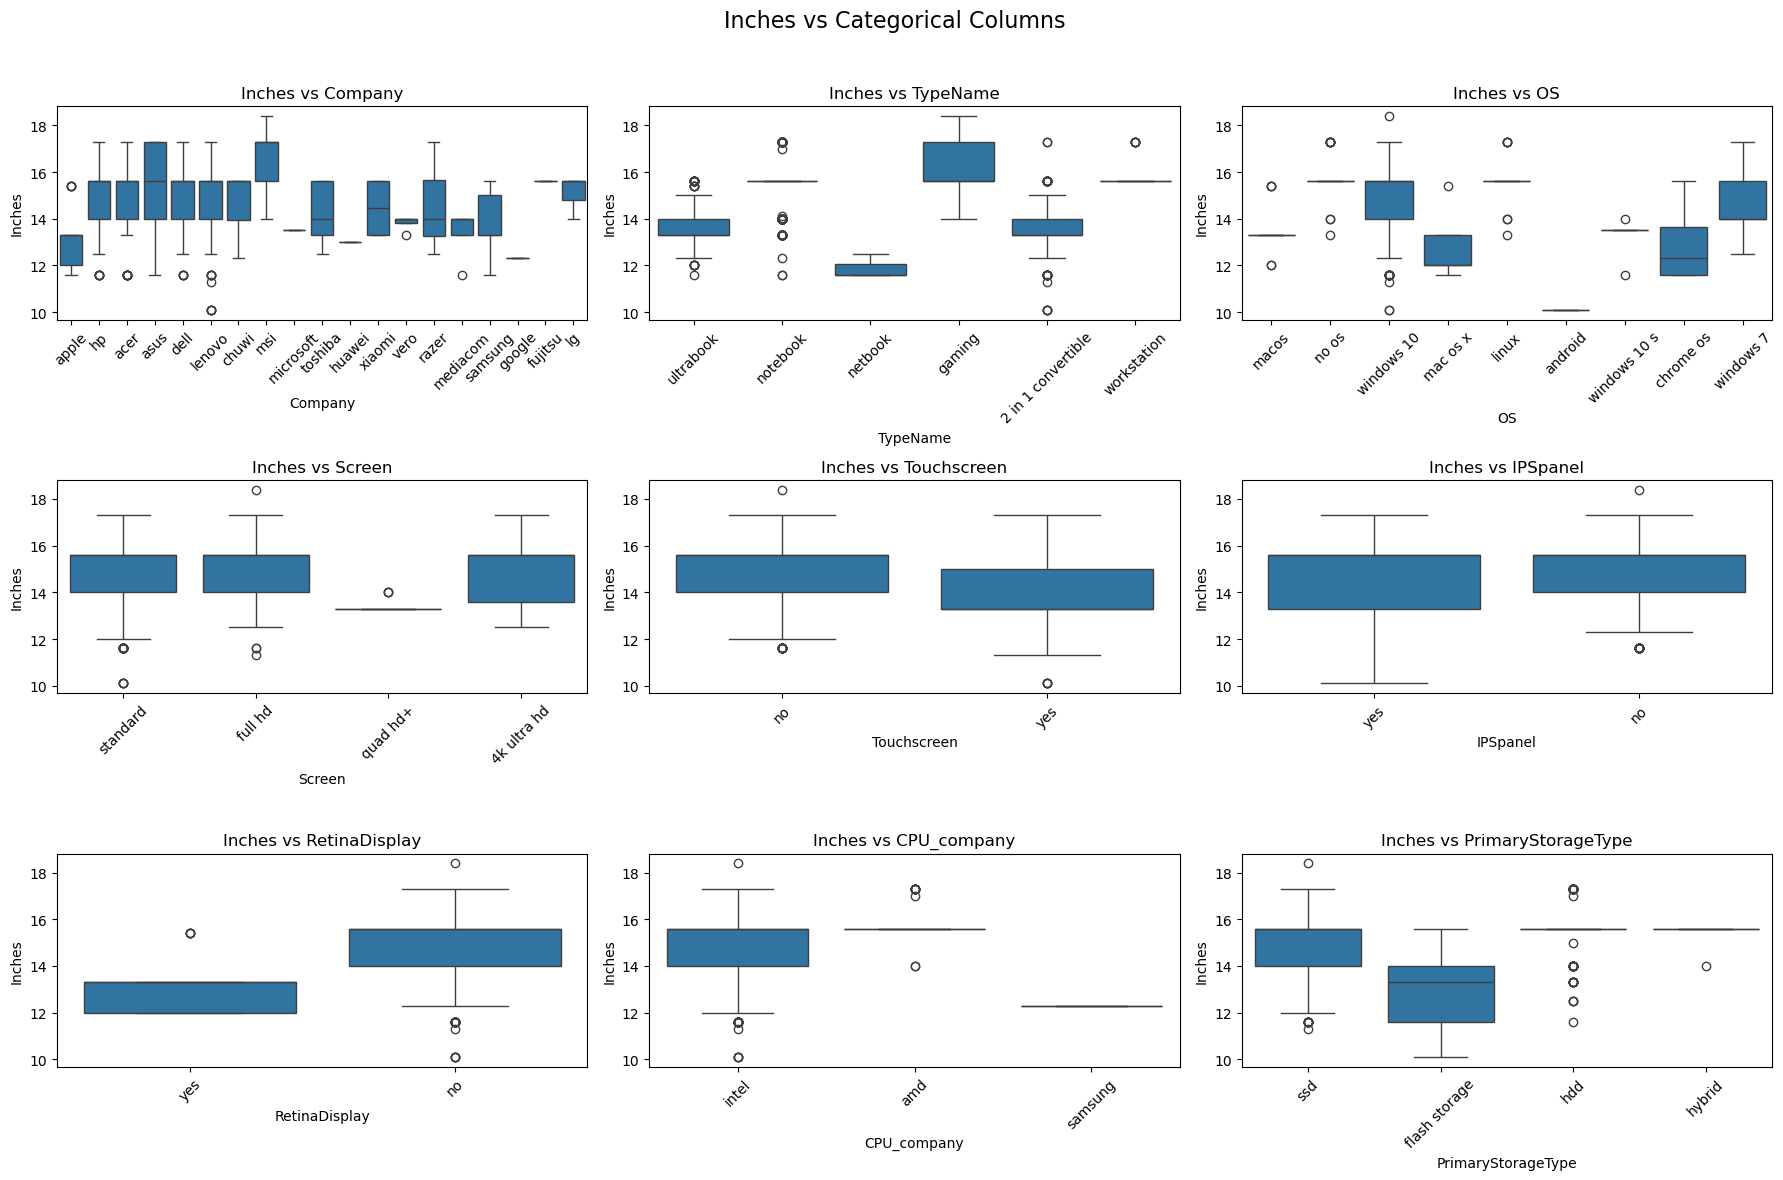

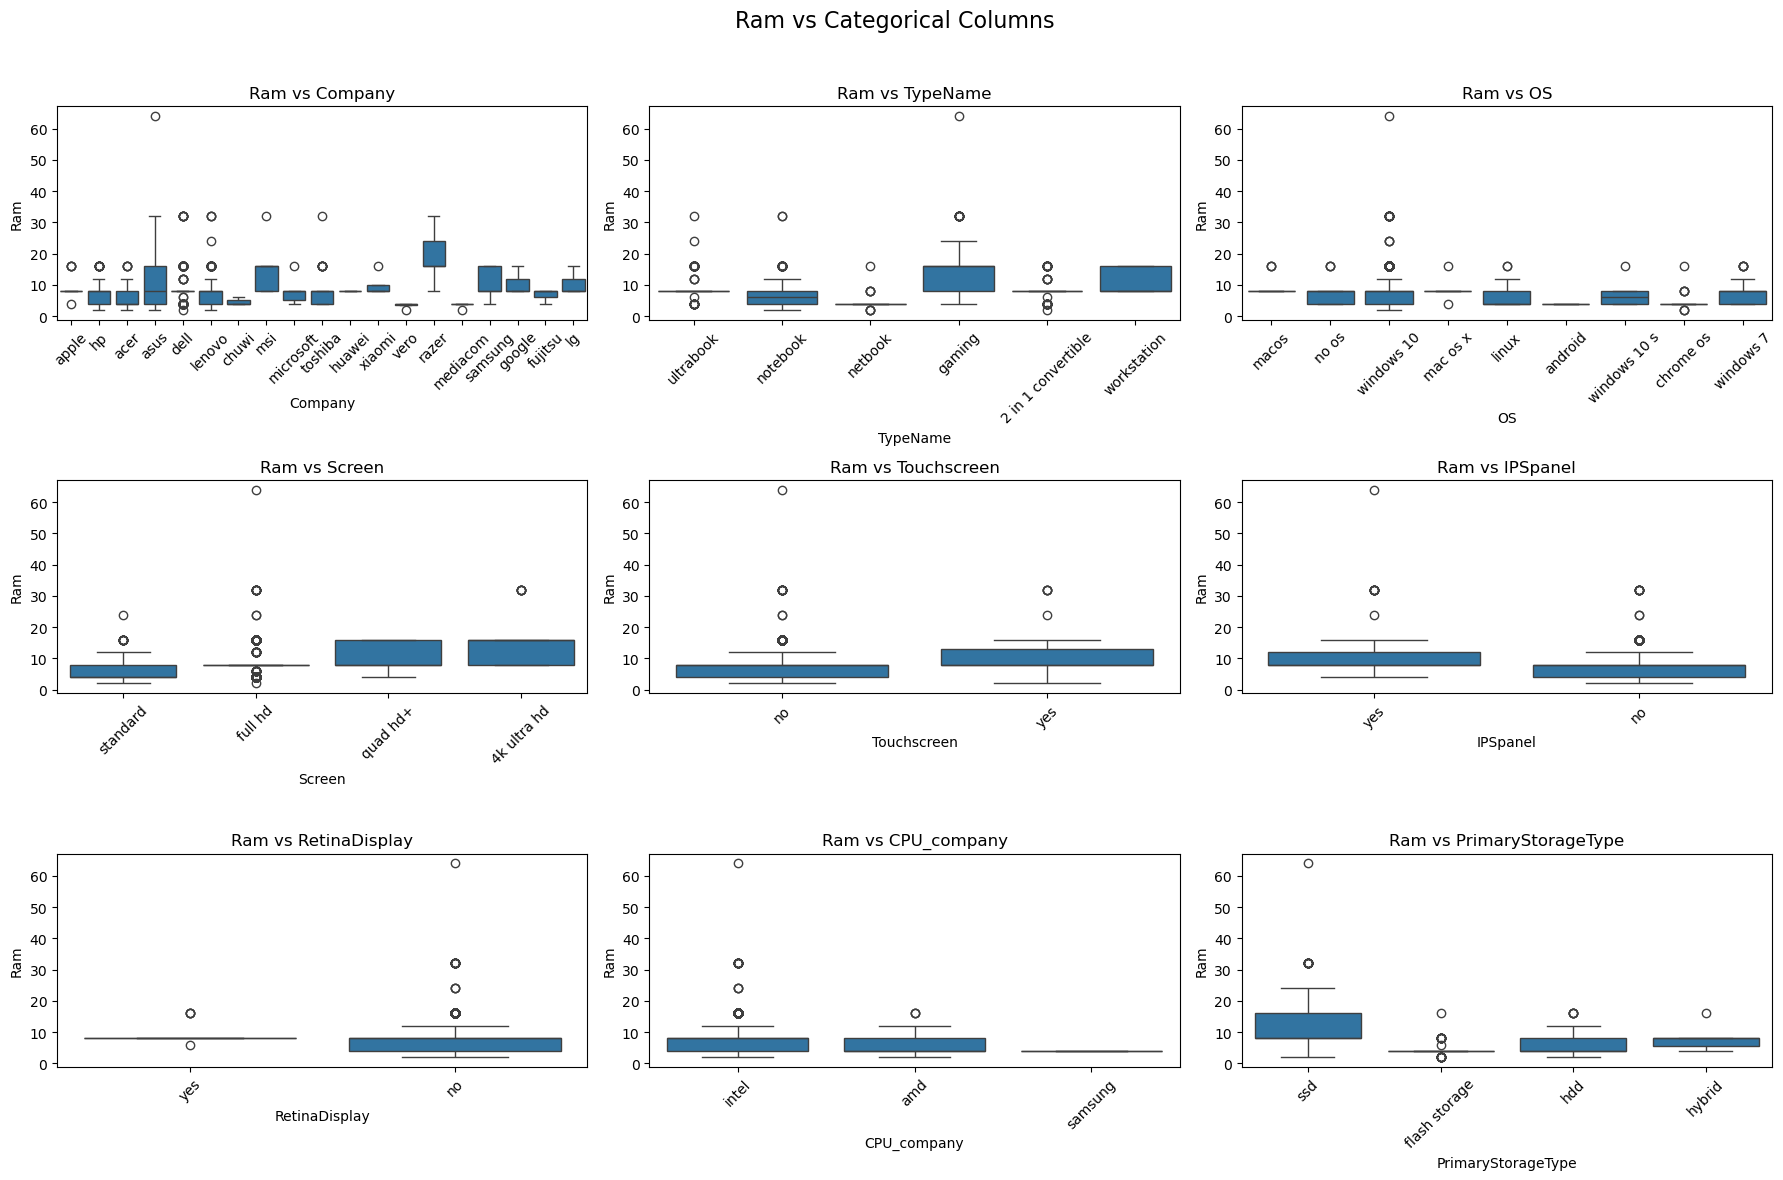

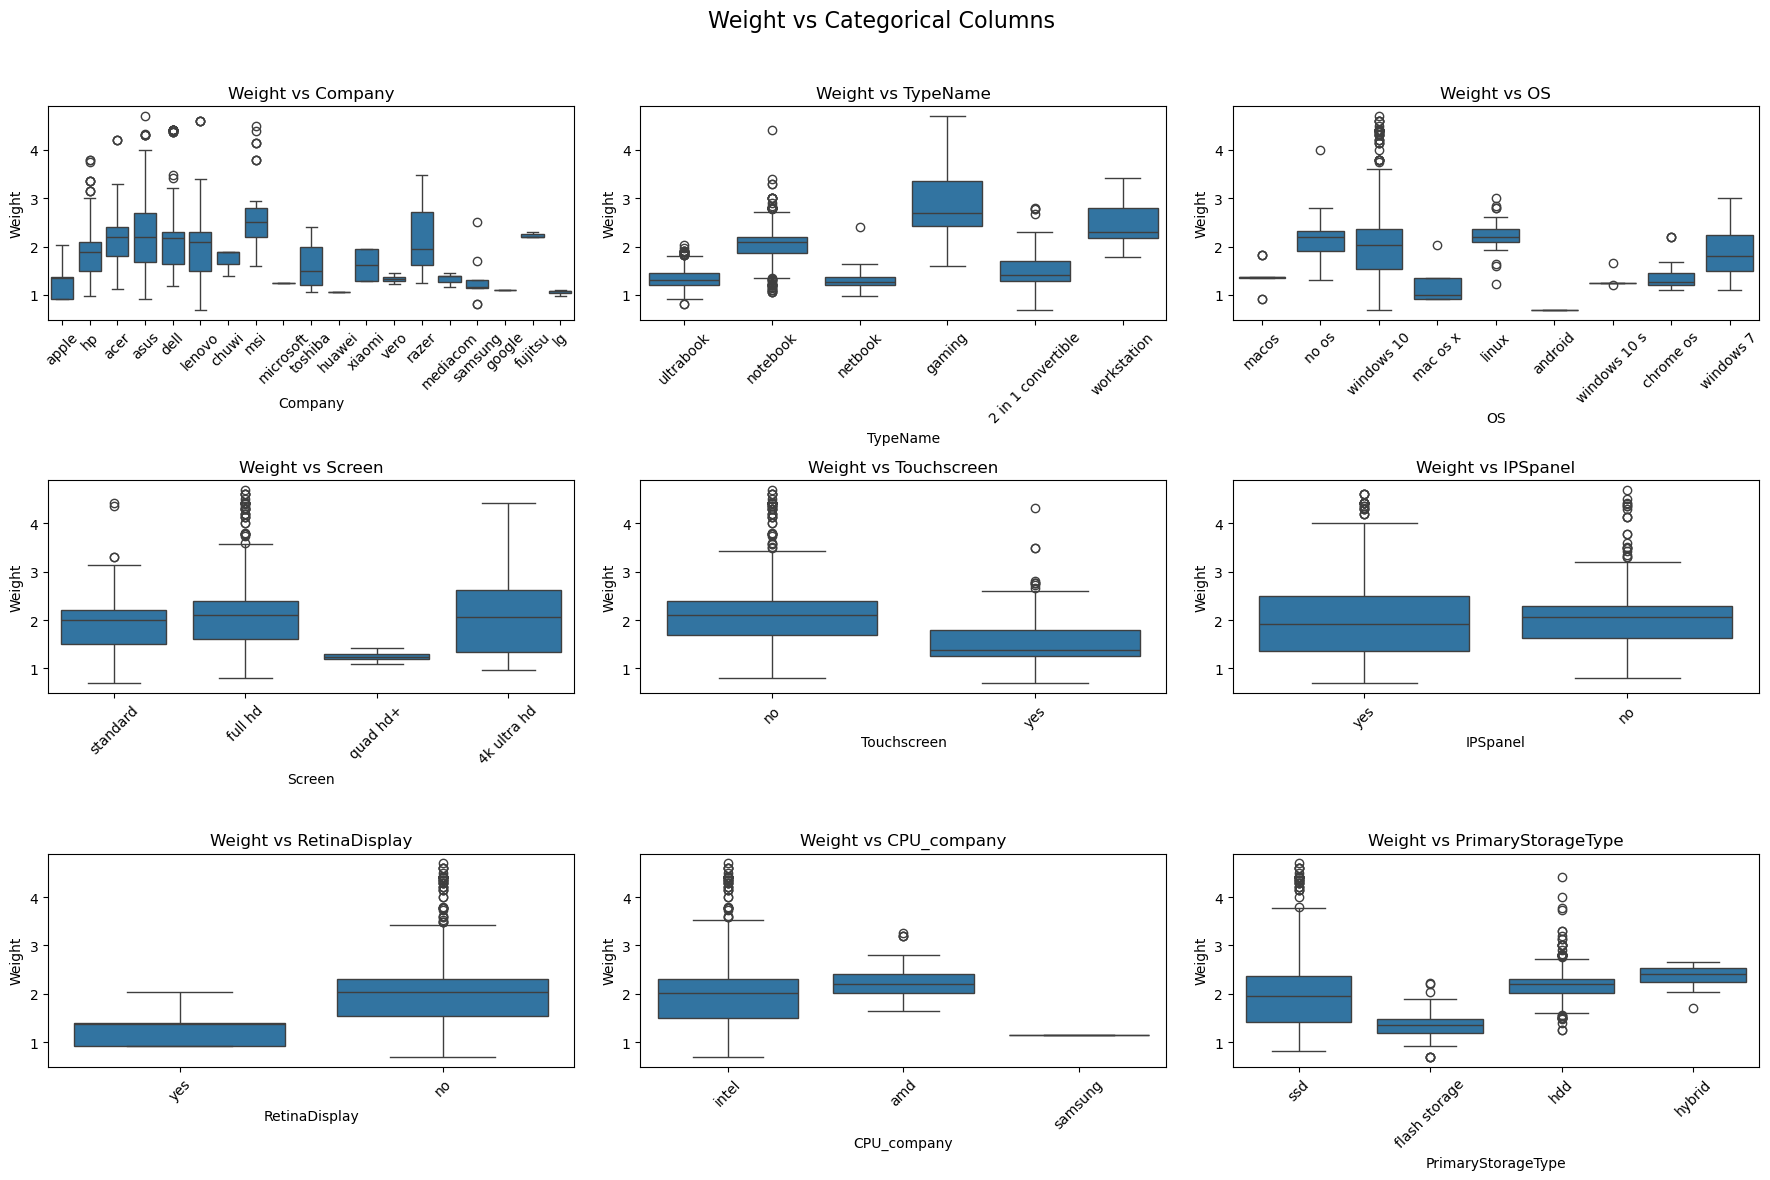

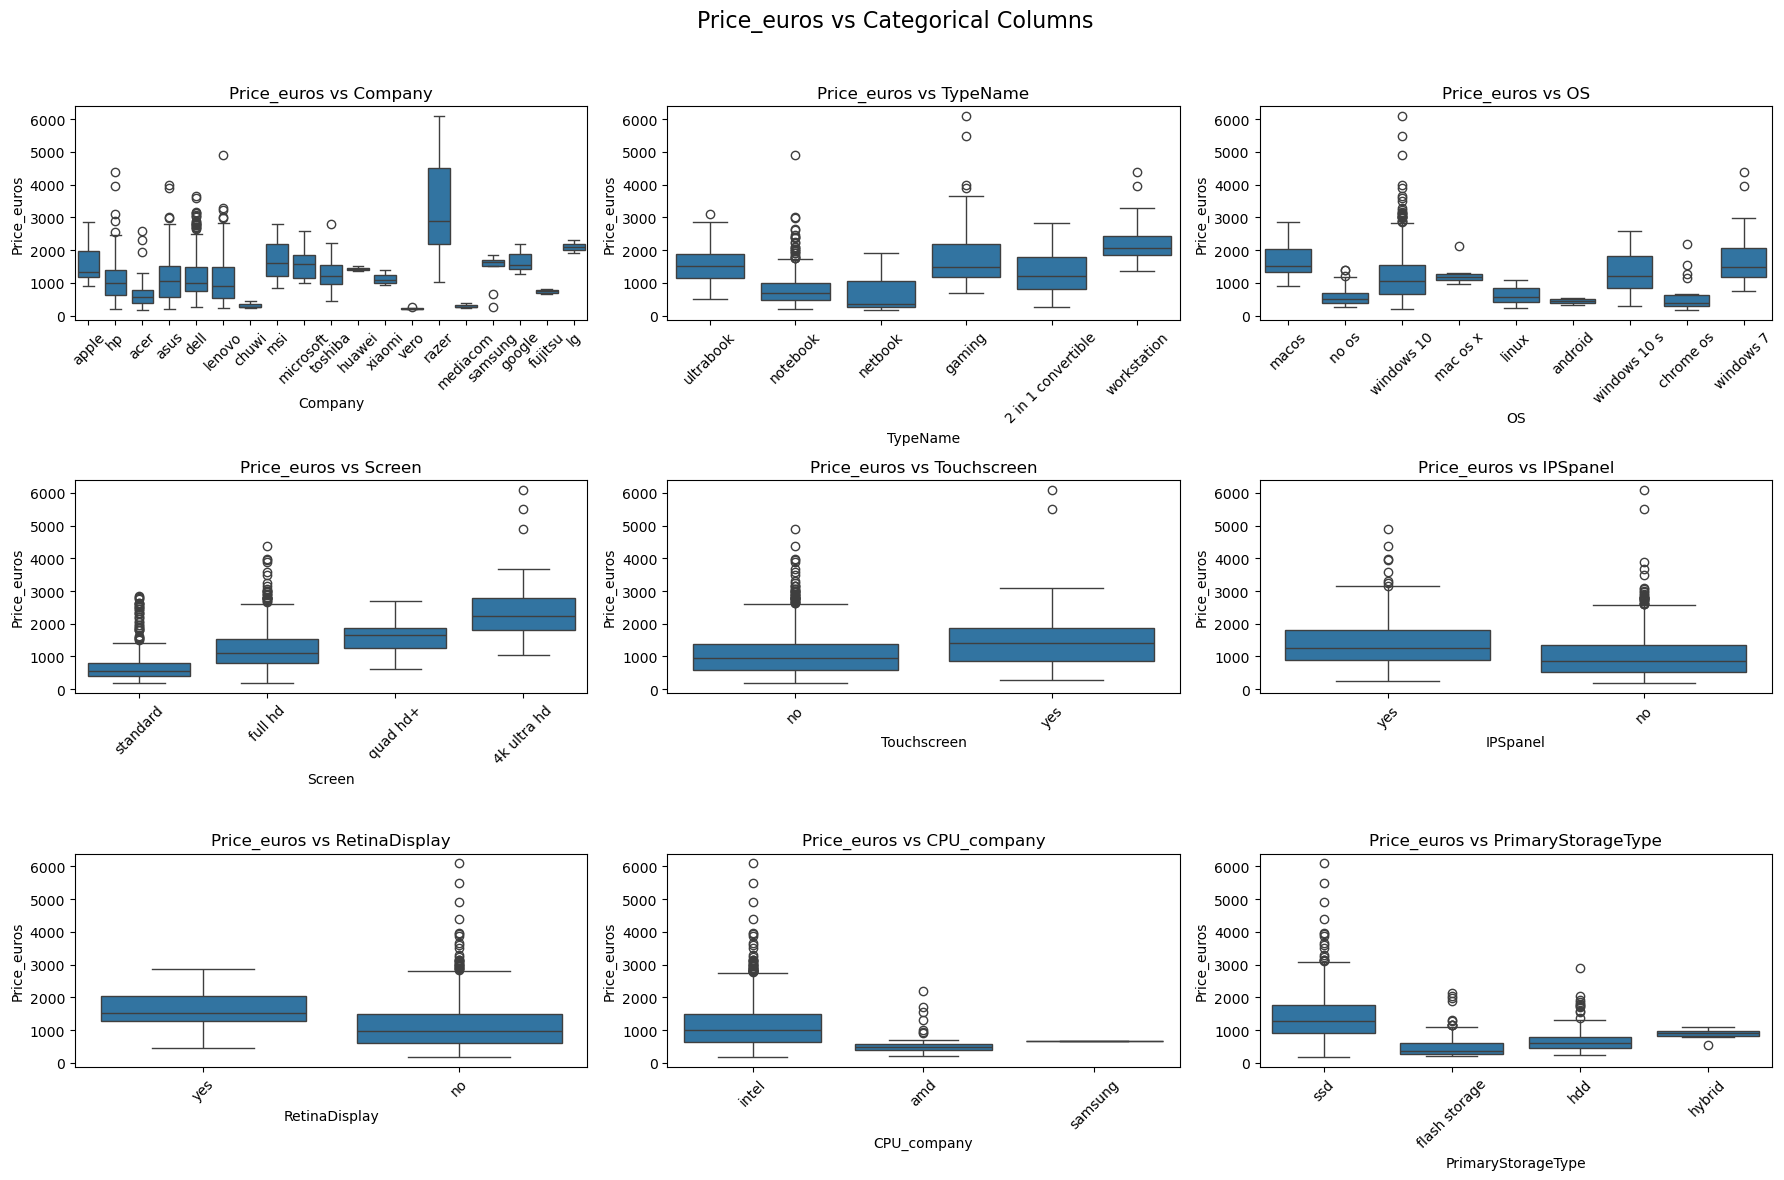

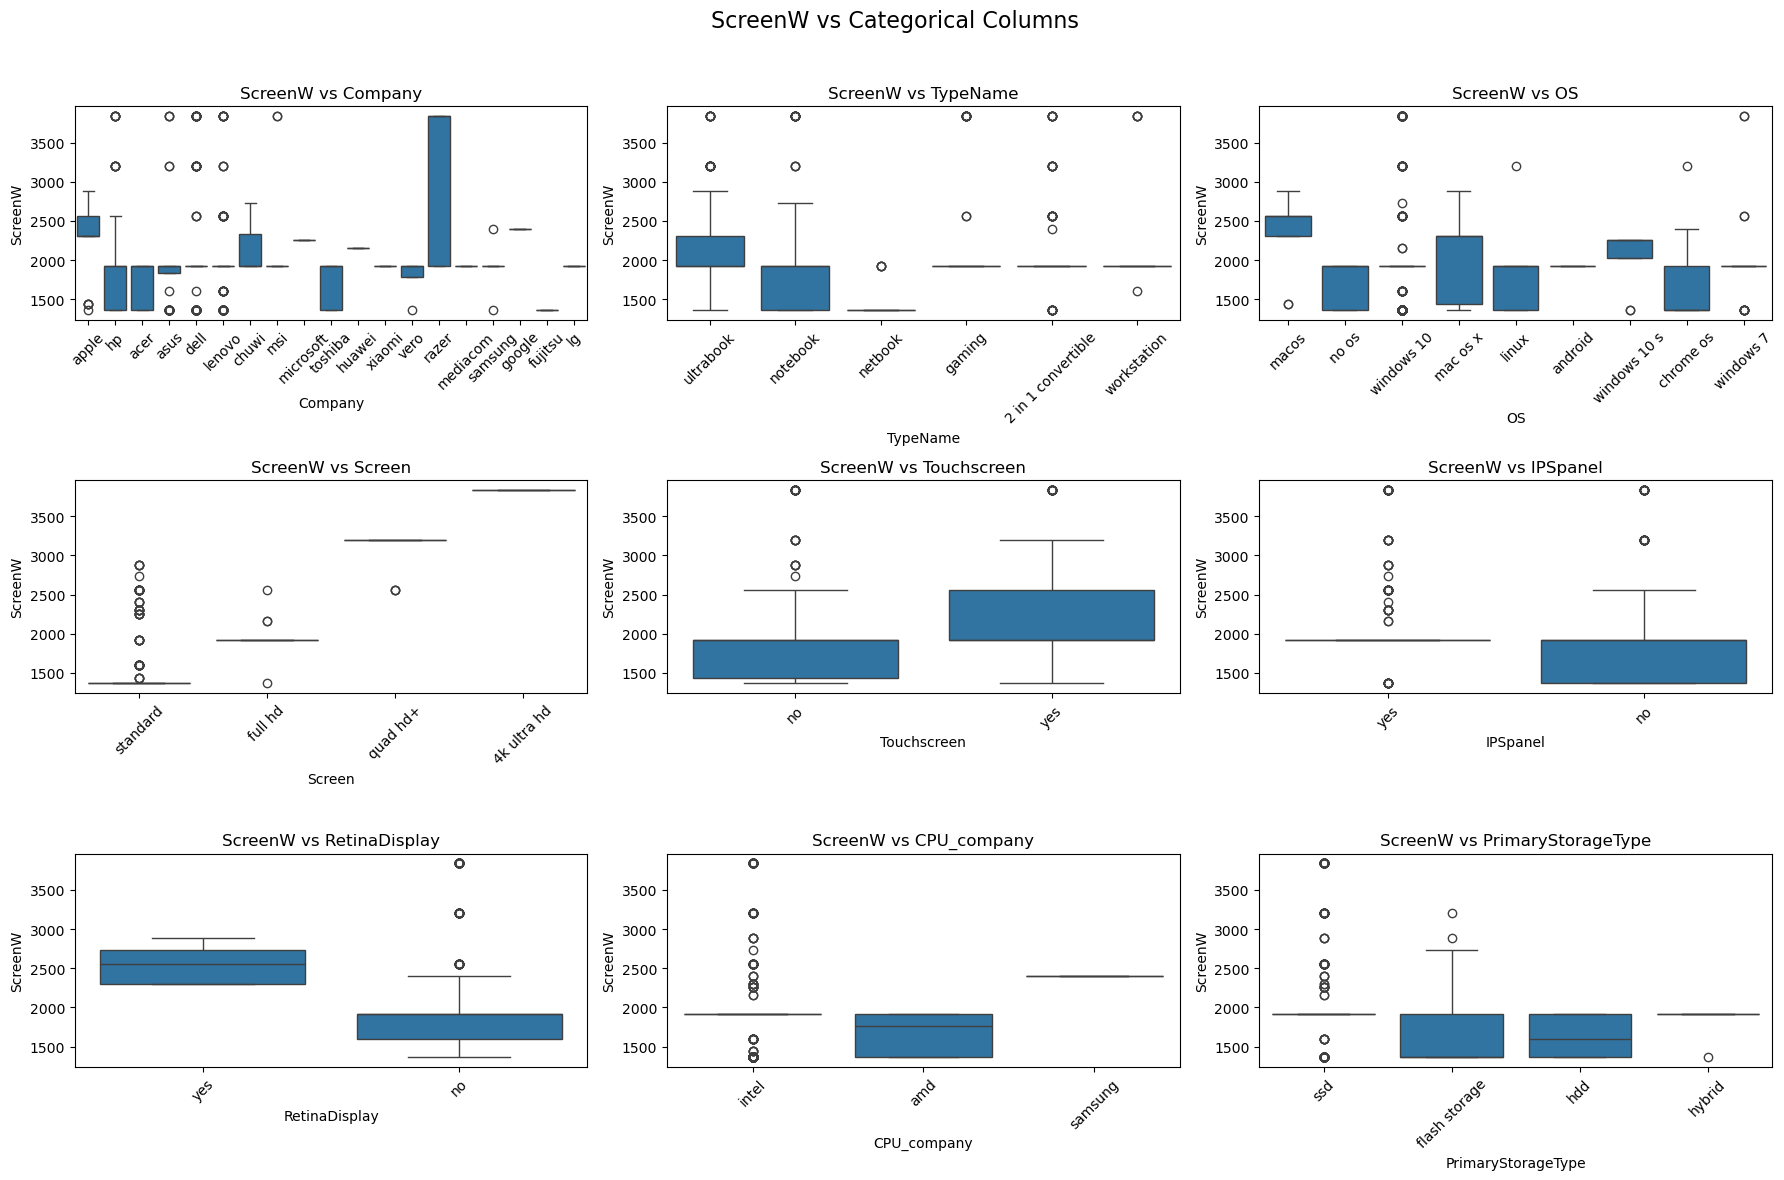

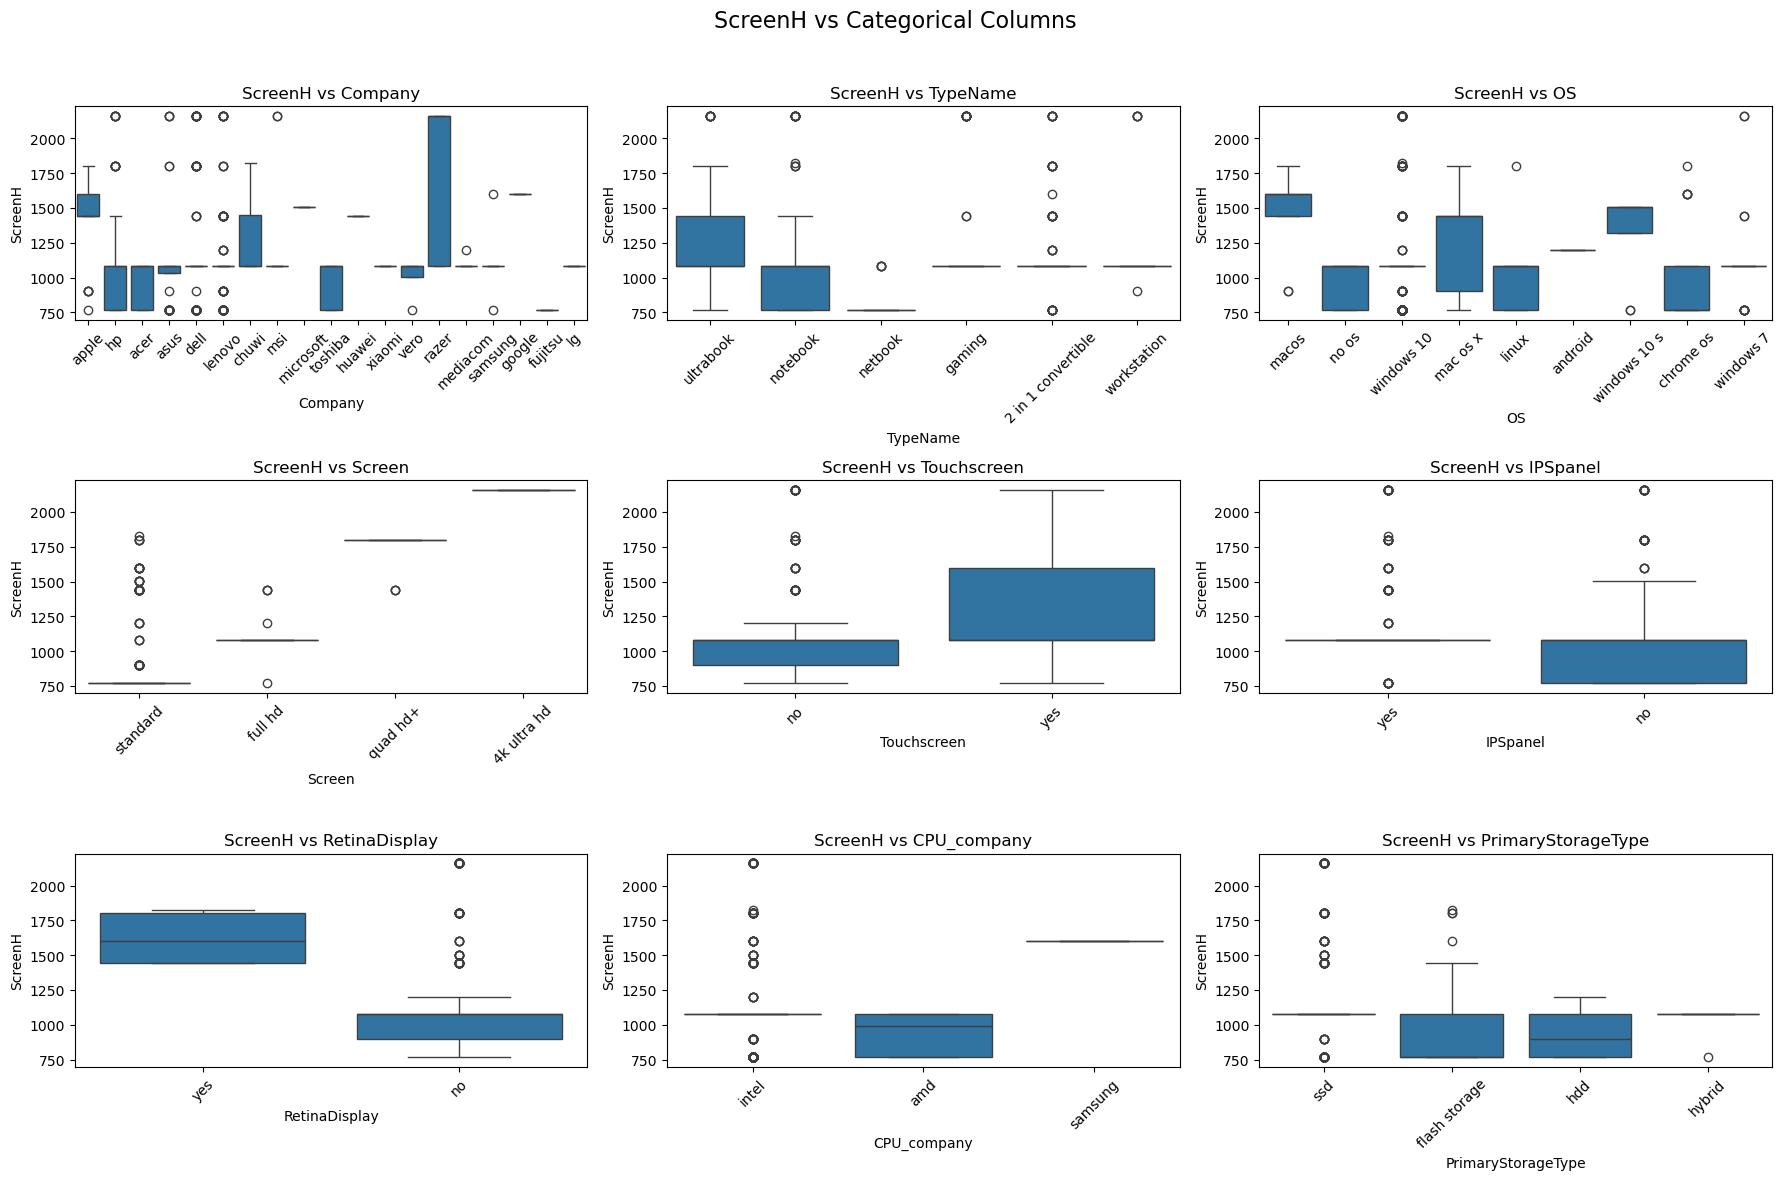

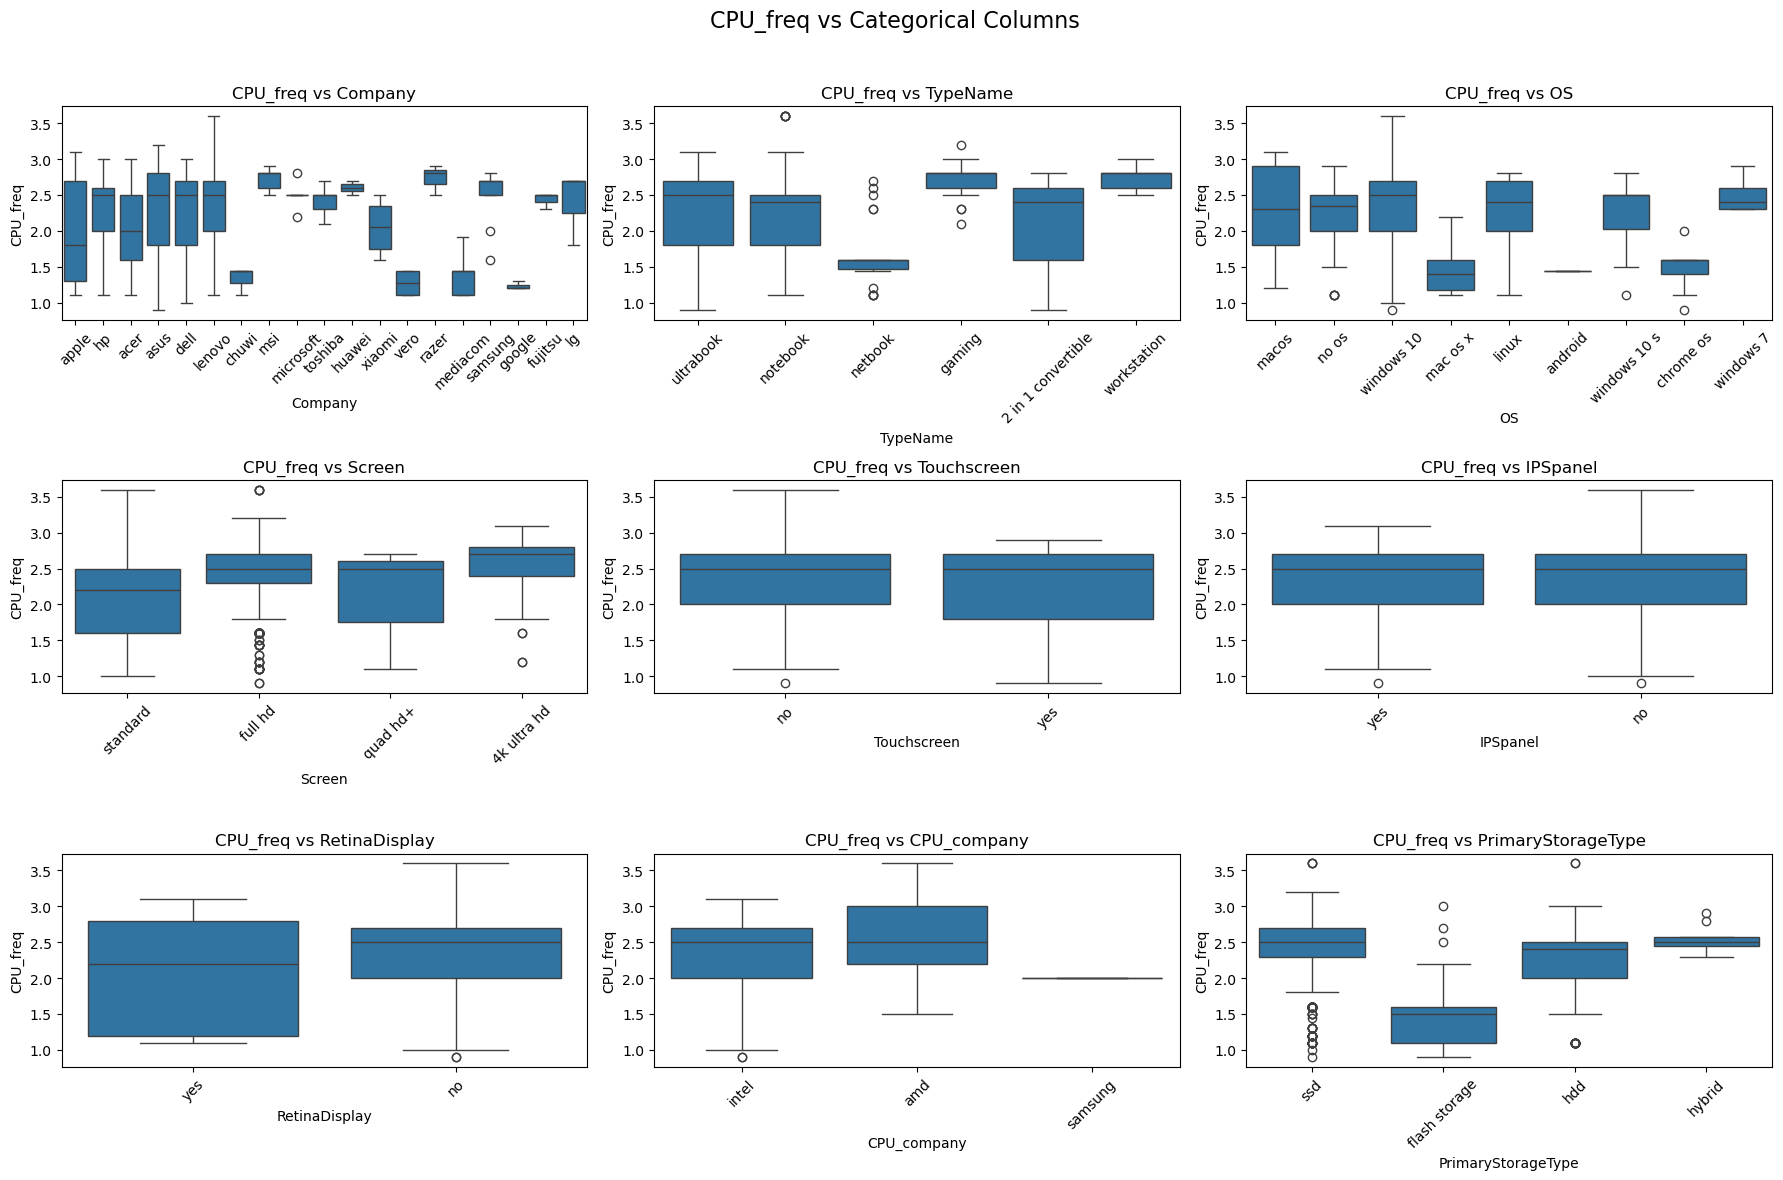

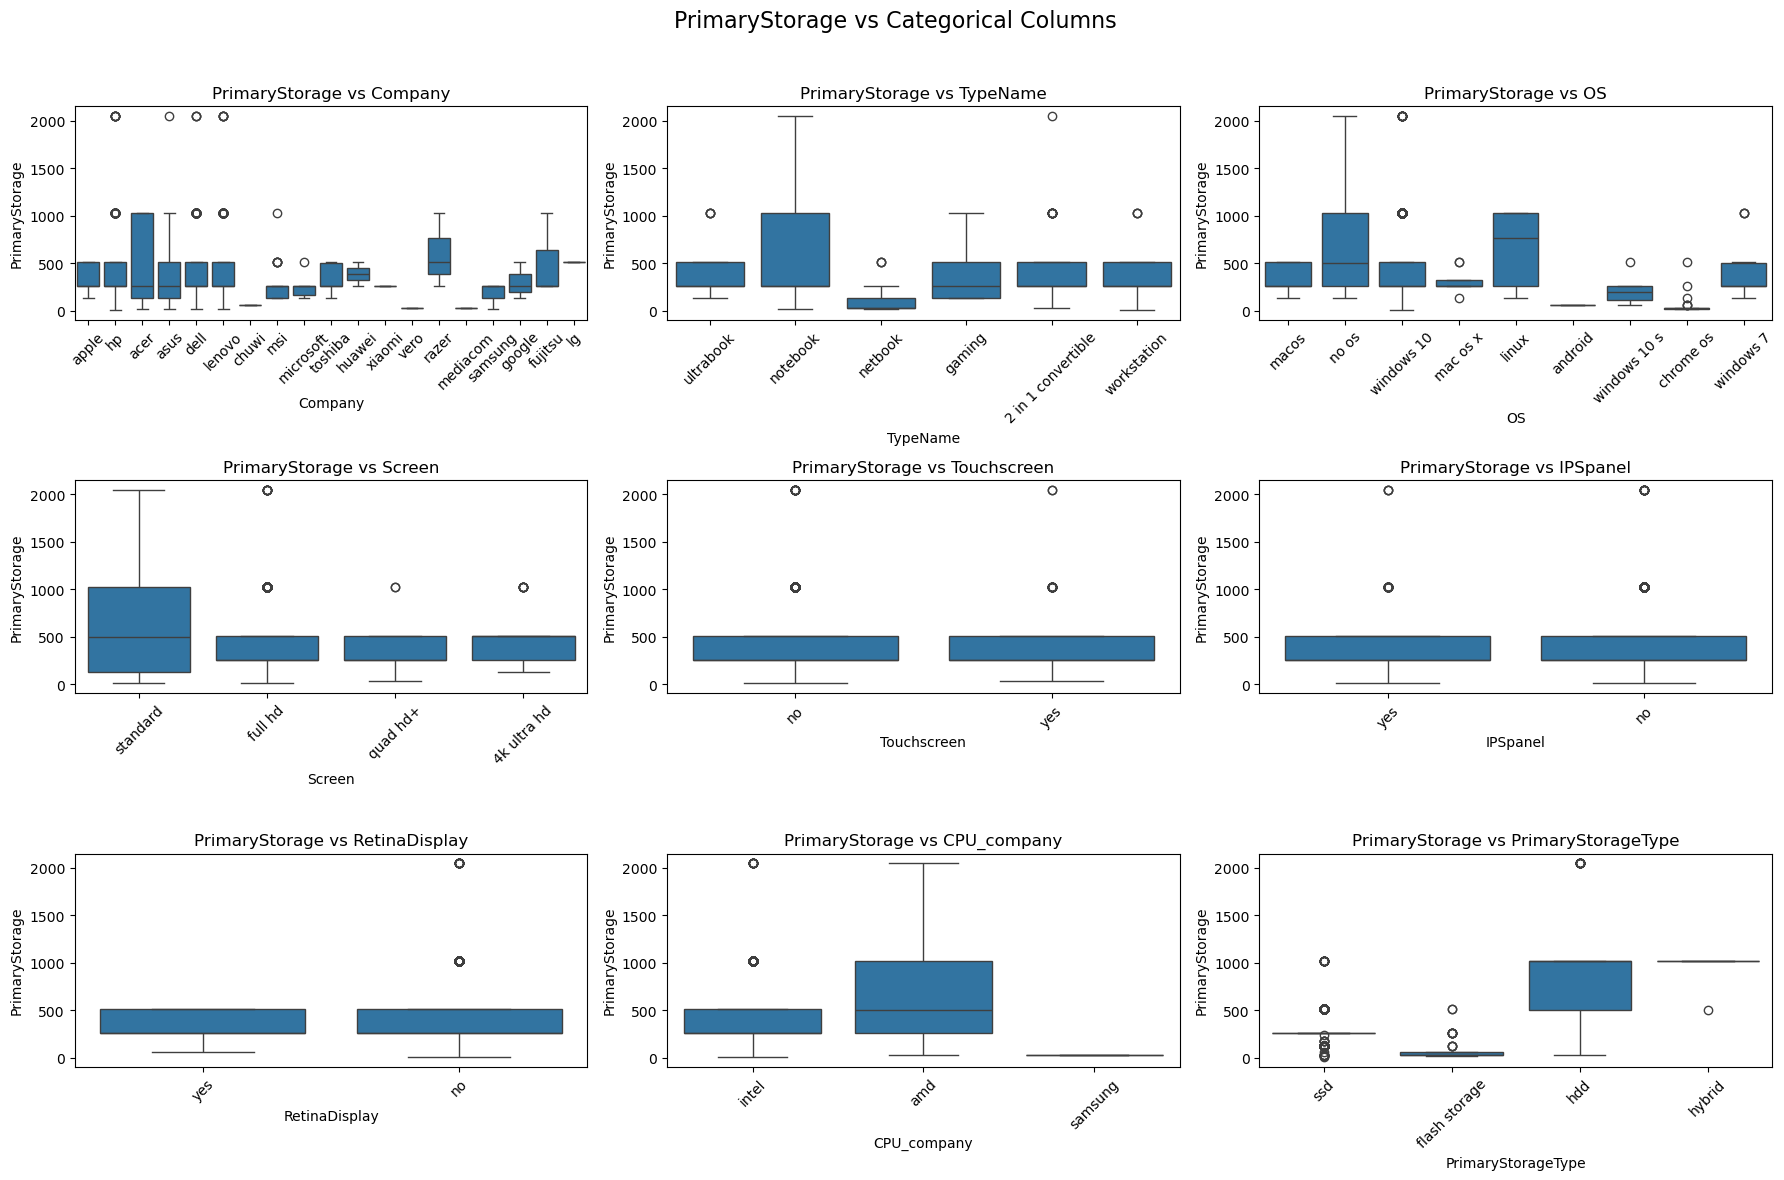

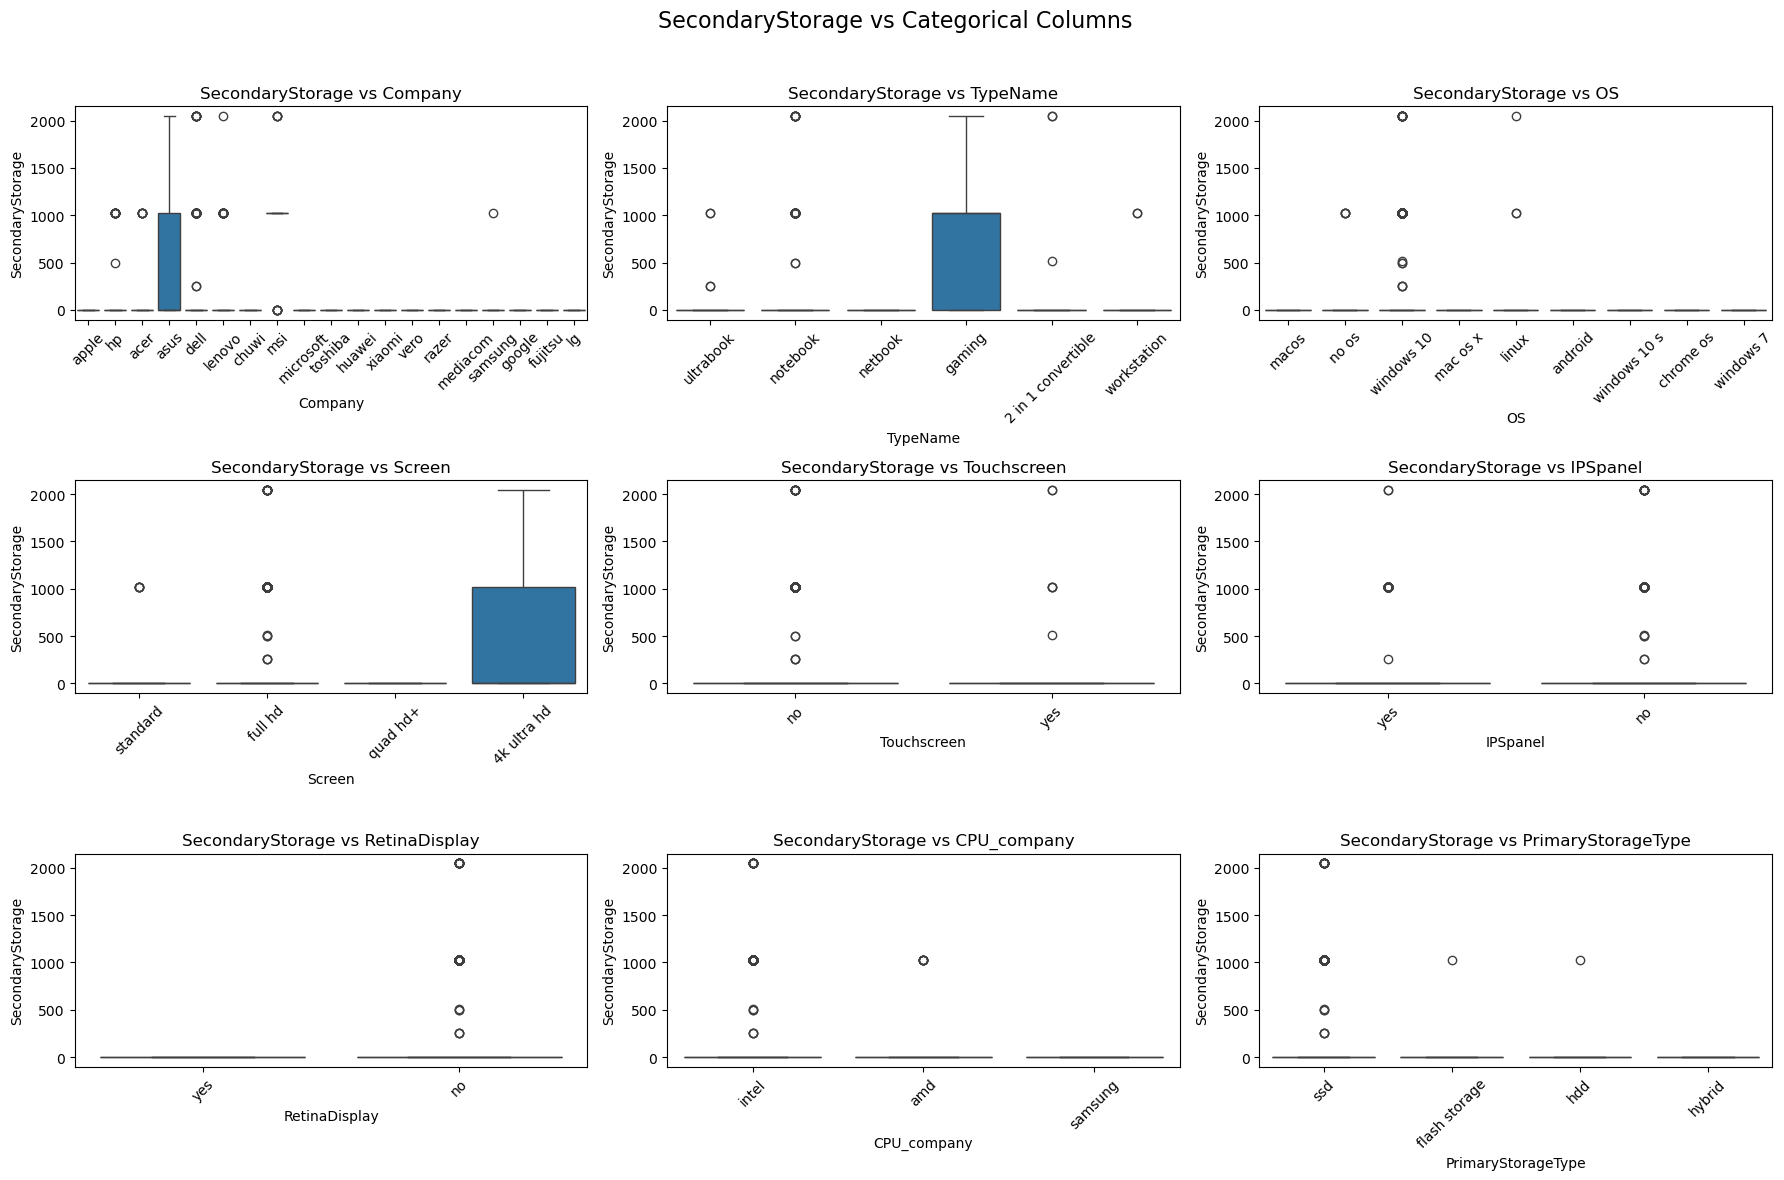

In [22]:
# Plotting boxplots: 3x3 grid for each numerical column across one or more categorical features
for num_col in numerical_columns:
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    fig.suptitle(f'{num_col} vs Categorical Columns', fontsize=16)
    
    for i, cat_col in enumerate(categorical_columns[:9]):  # Show for first 9 categorical columns
        row, col = divmod(i, 3)
        sns.boxplot(data=data, x=cat_col, y=num_col, ax=axes[row, col])
        axes[row, col].set_title(f'{num_col} vs {cat_col}')
        axes[row, col].tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

#### 4.2.4 Analyzing the relation between numerical and categorical columns with barplot

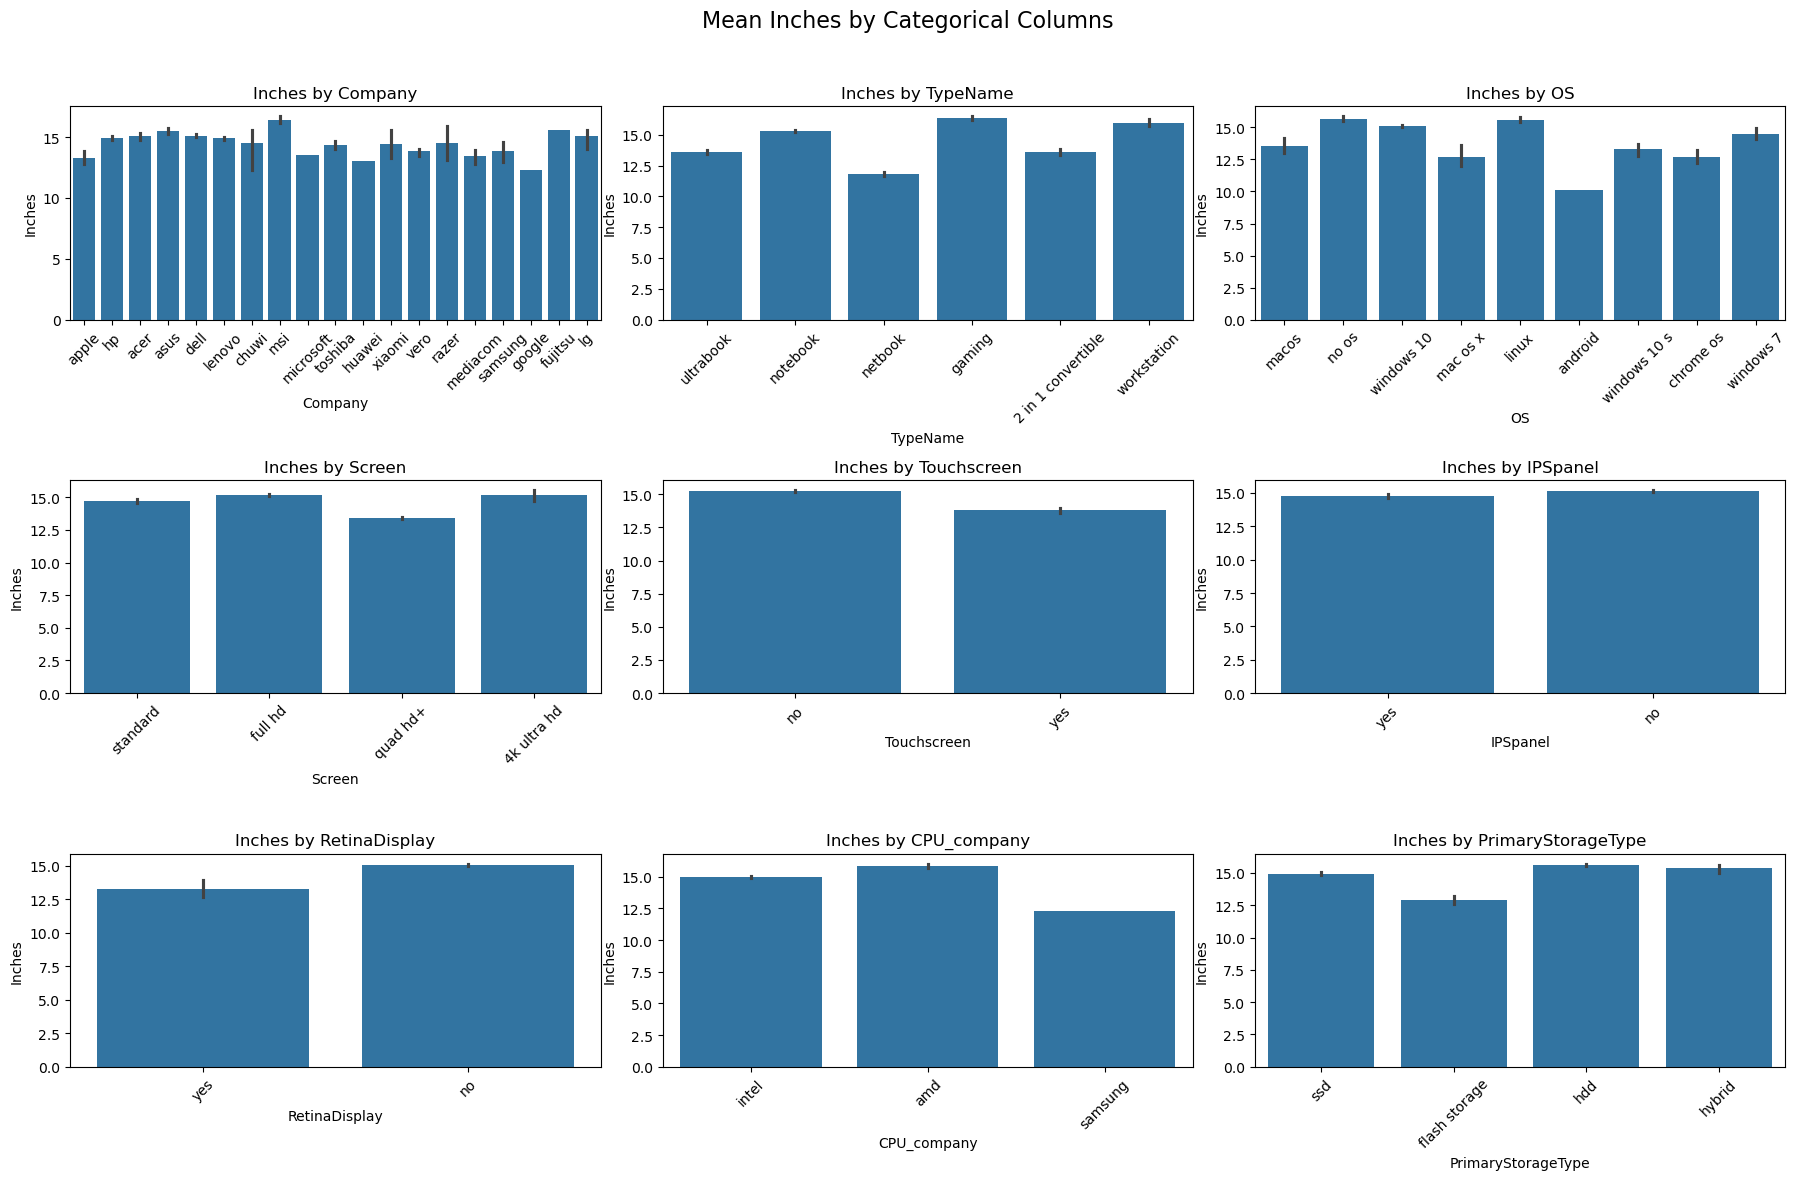

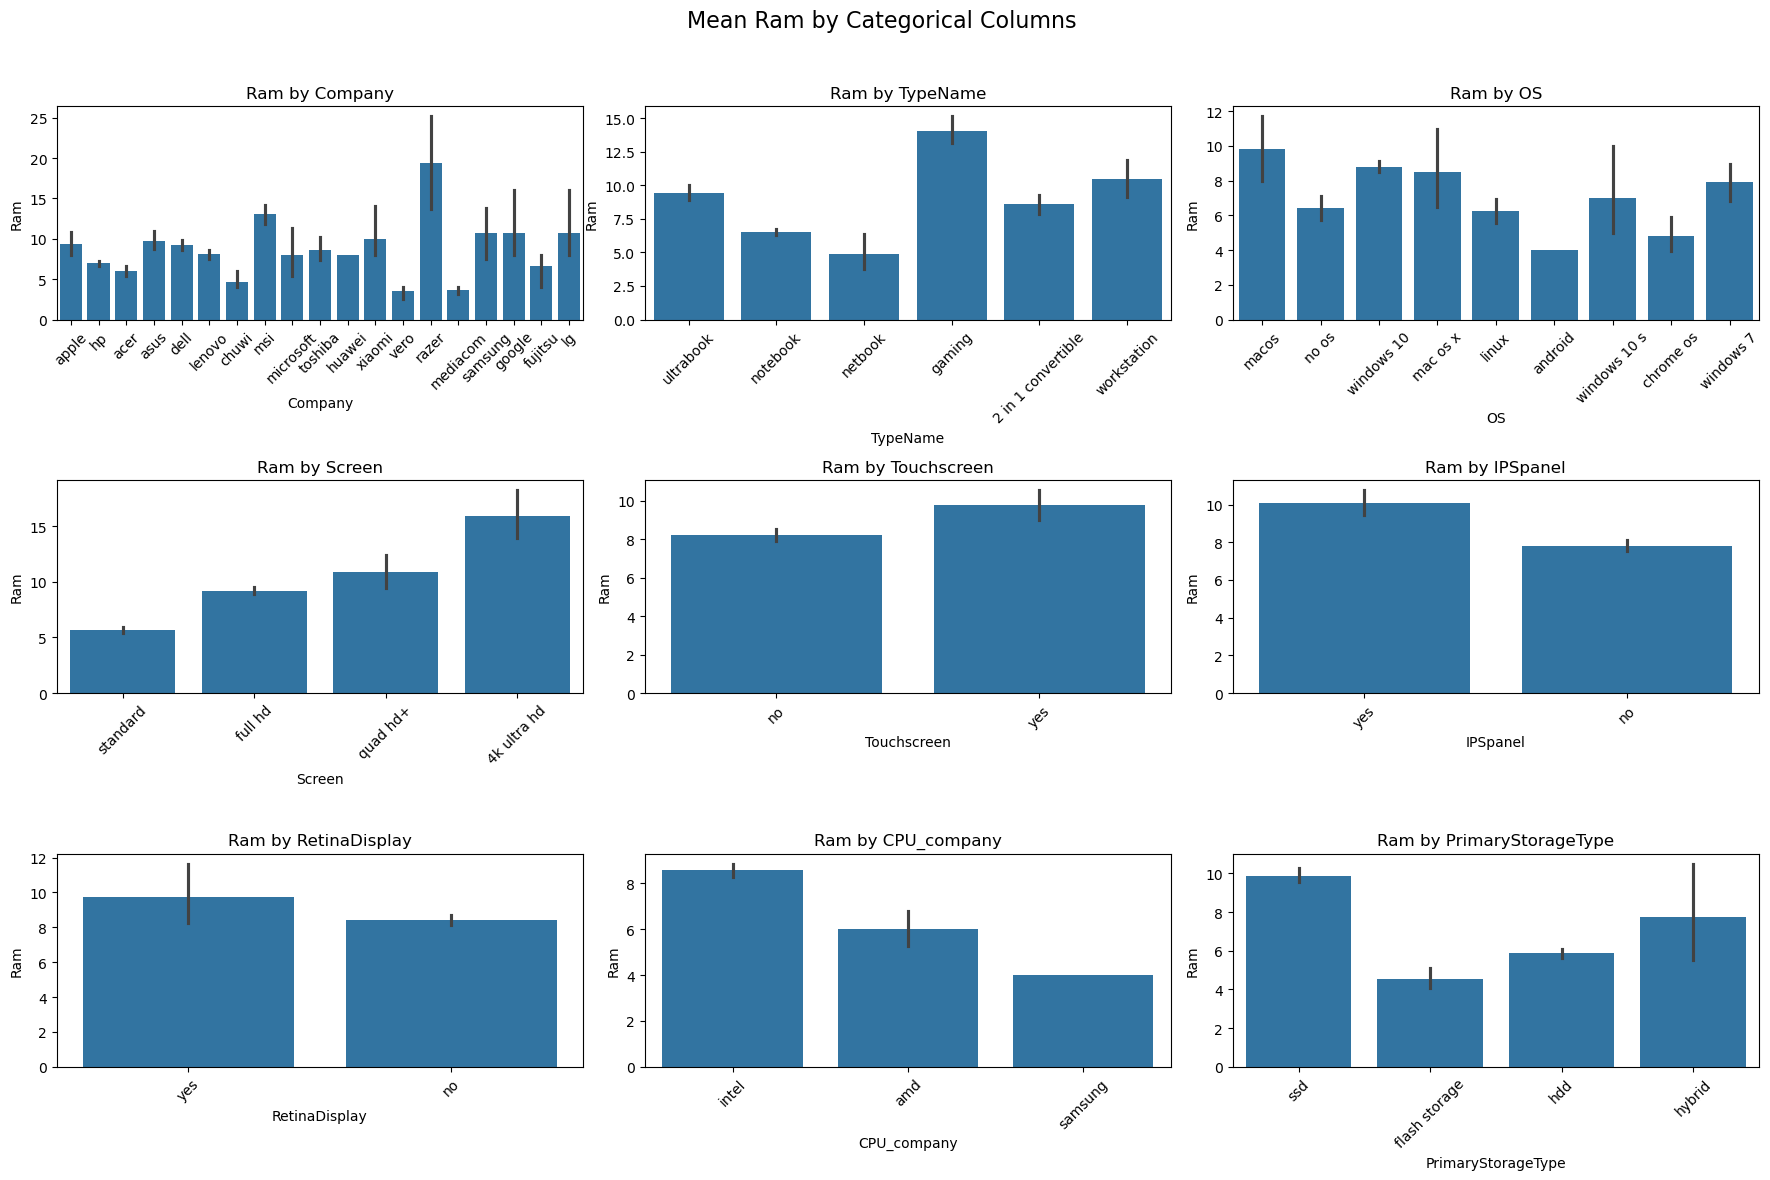

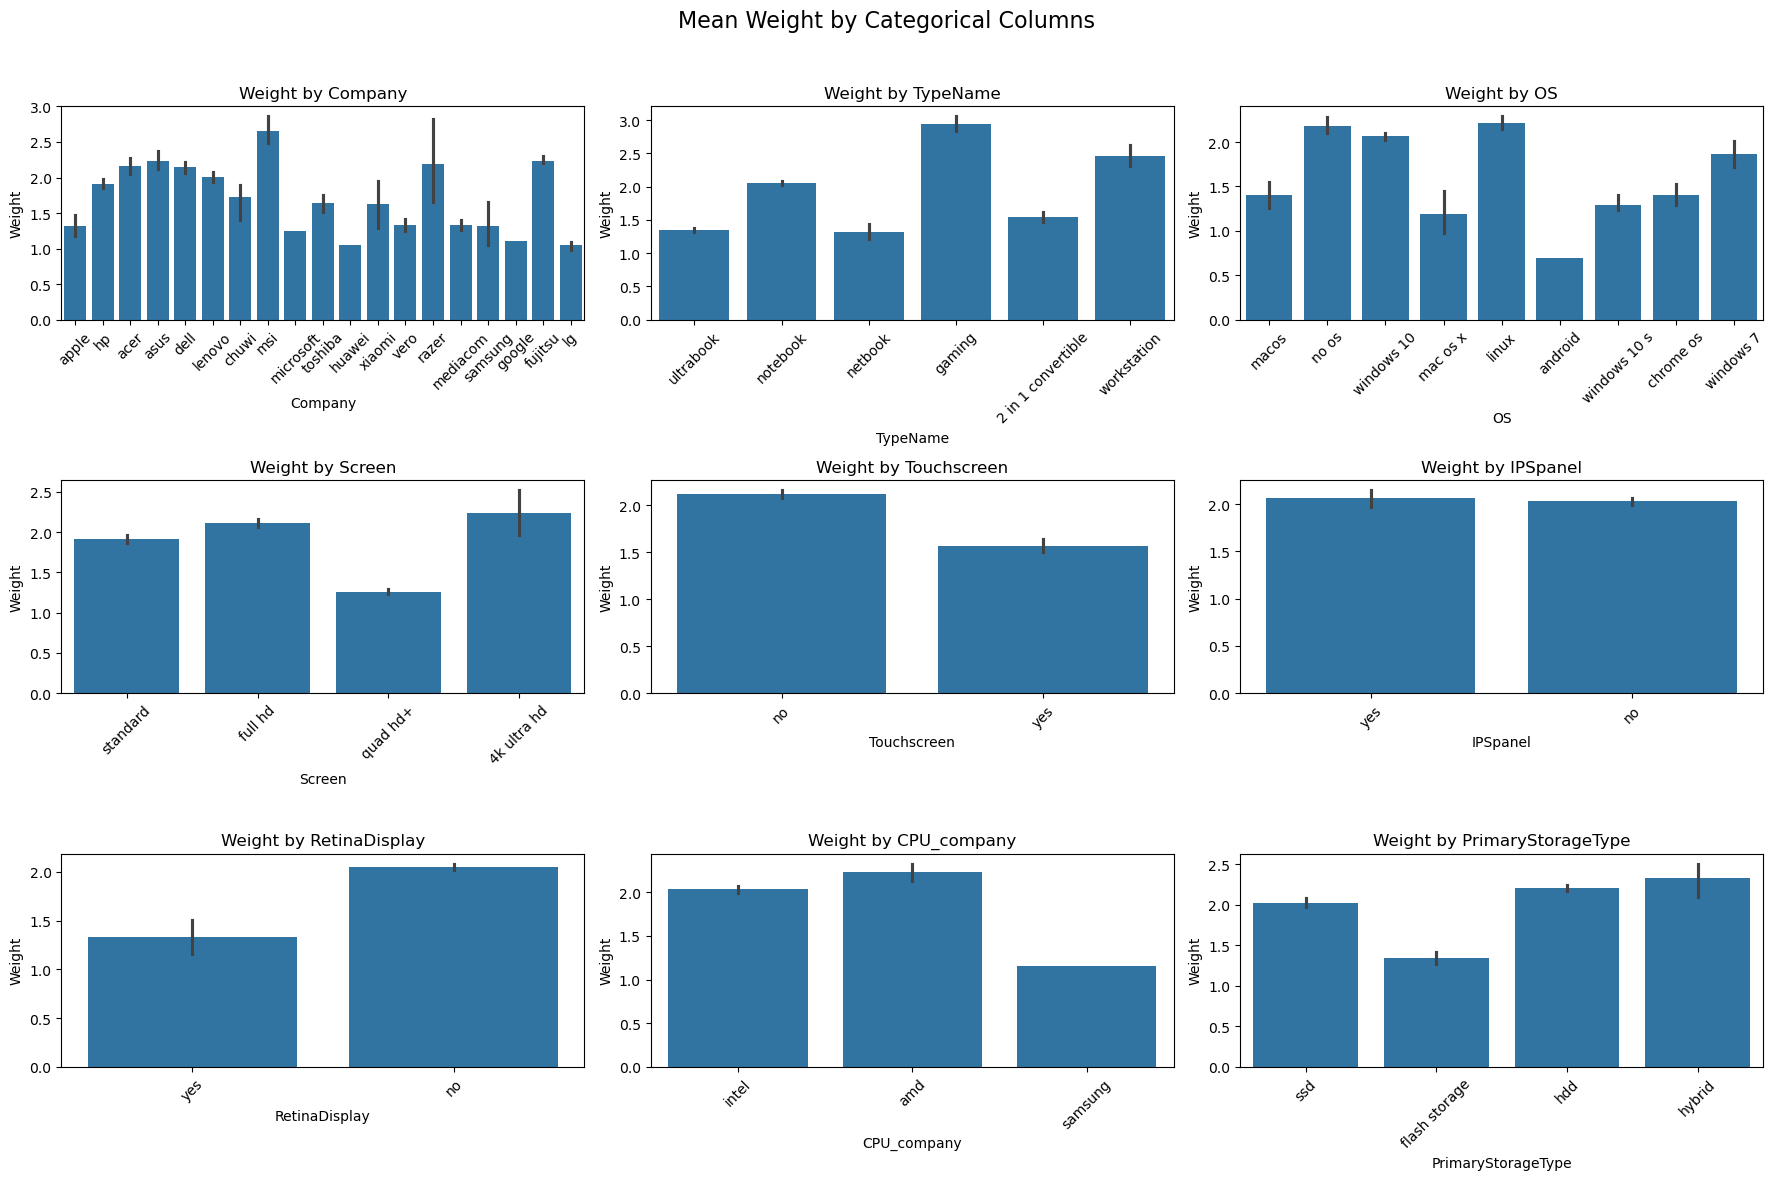

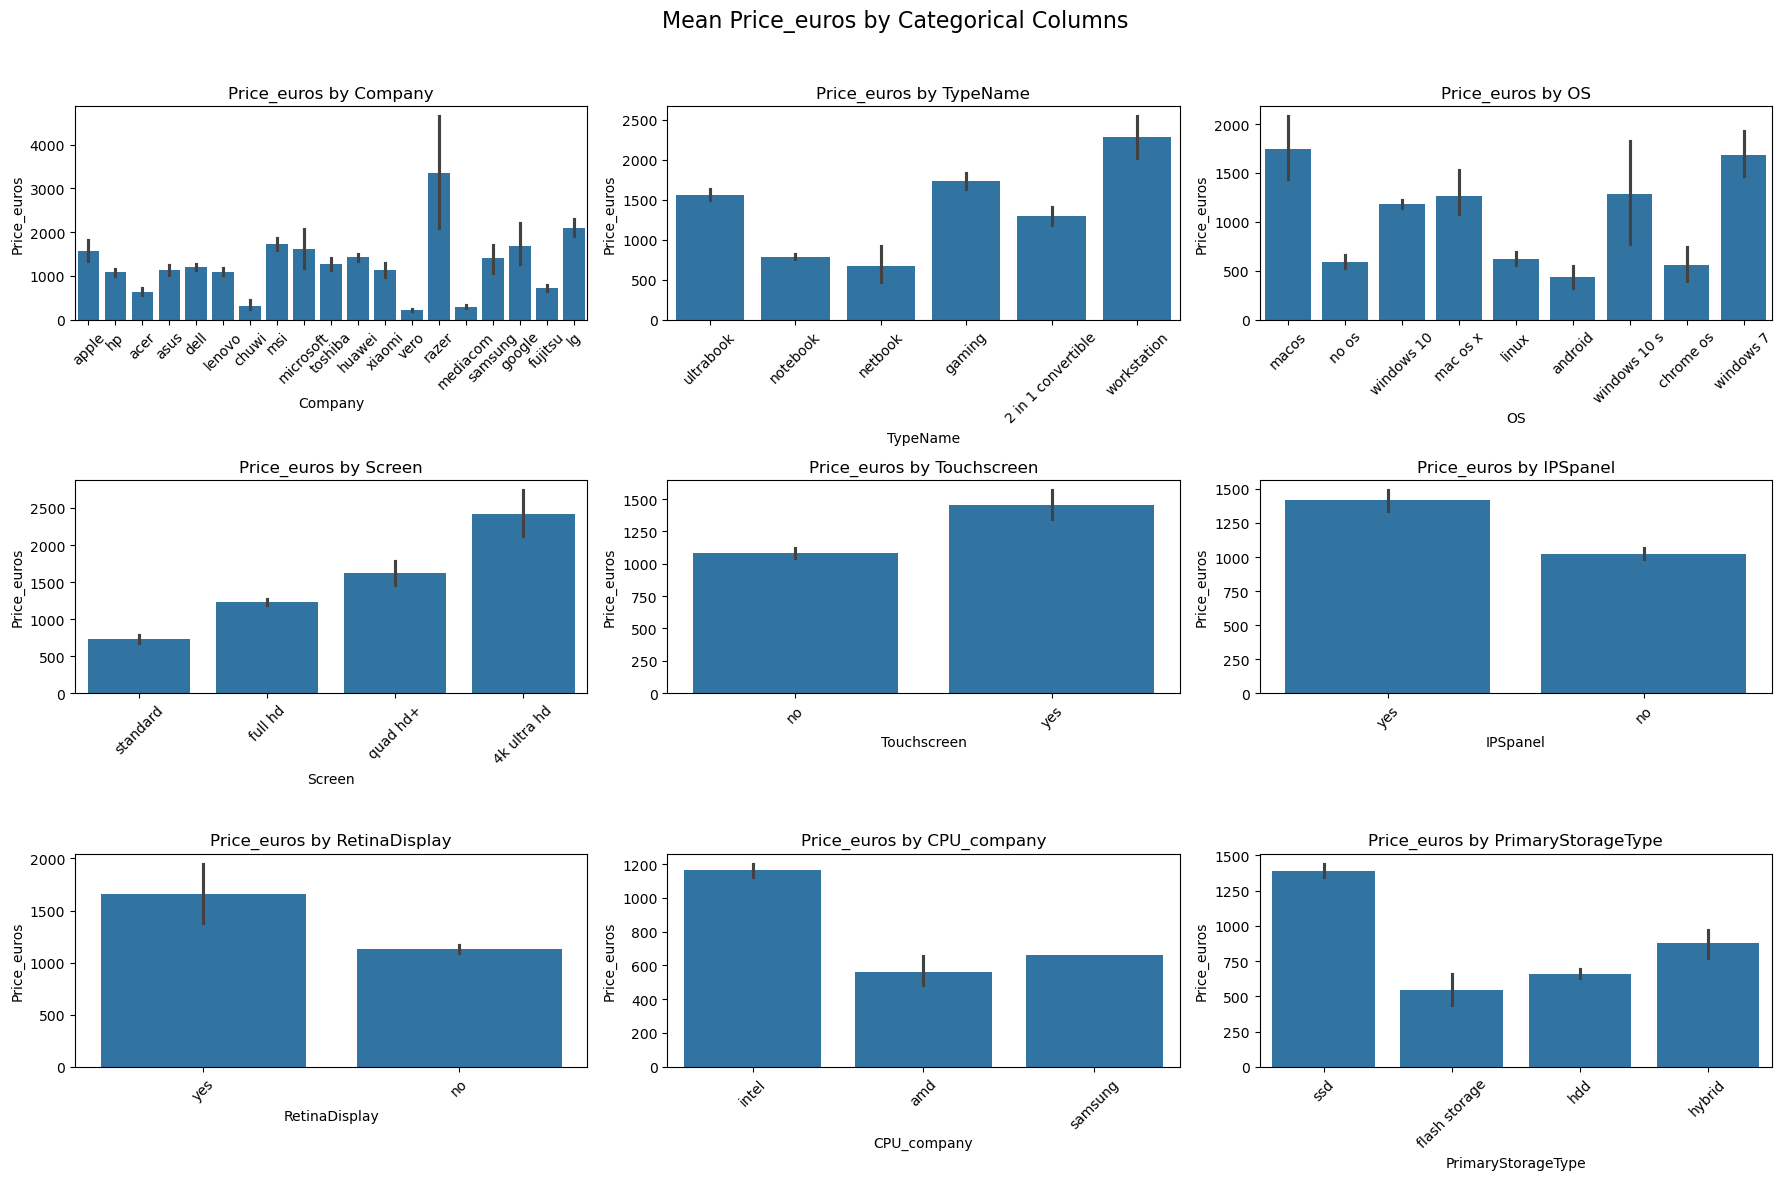

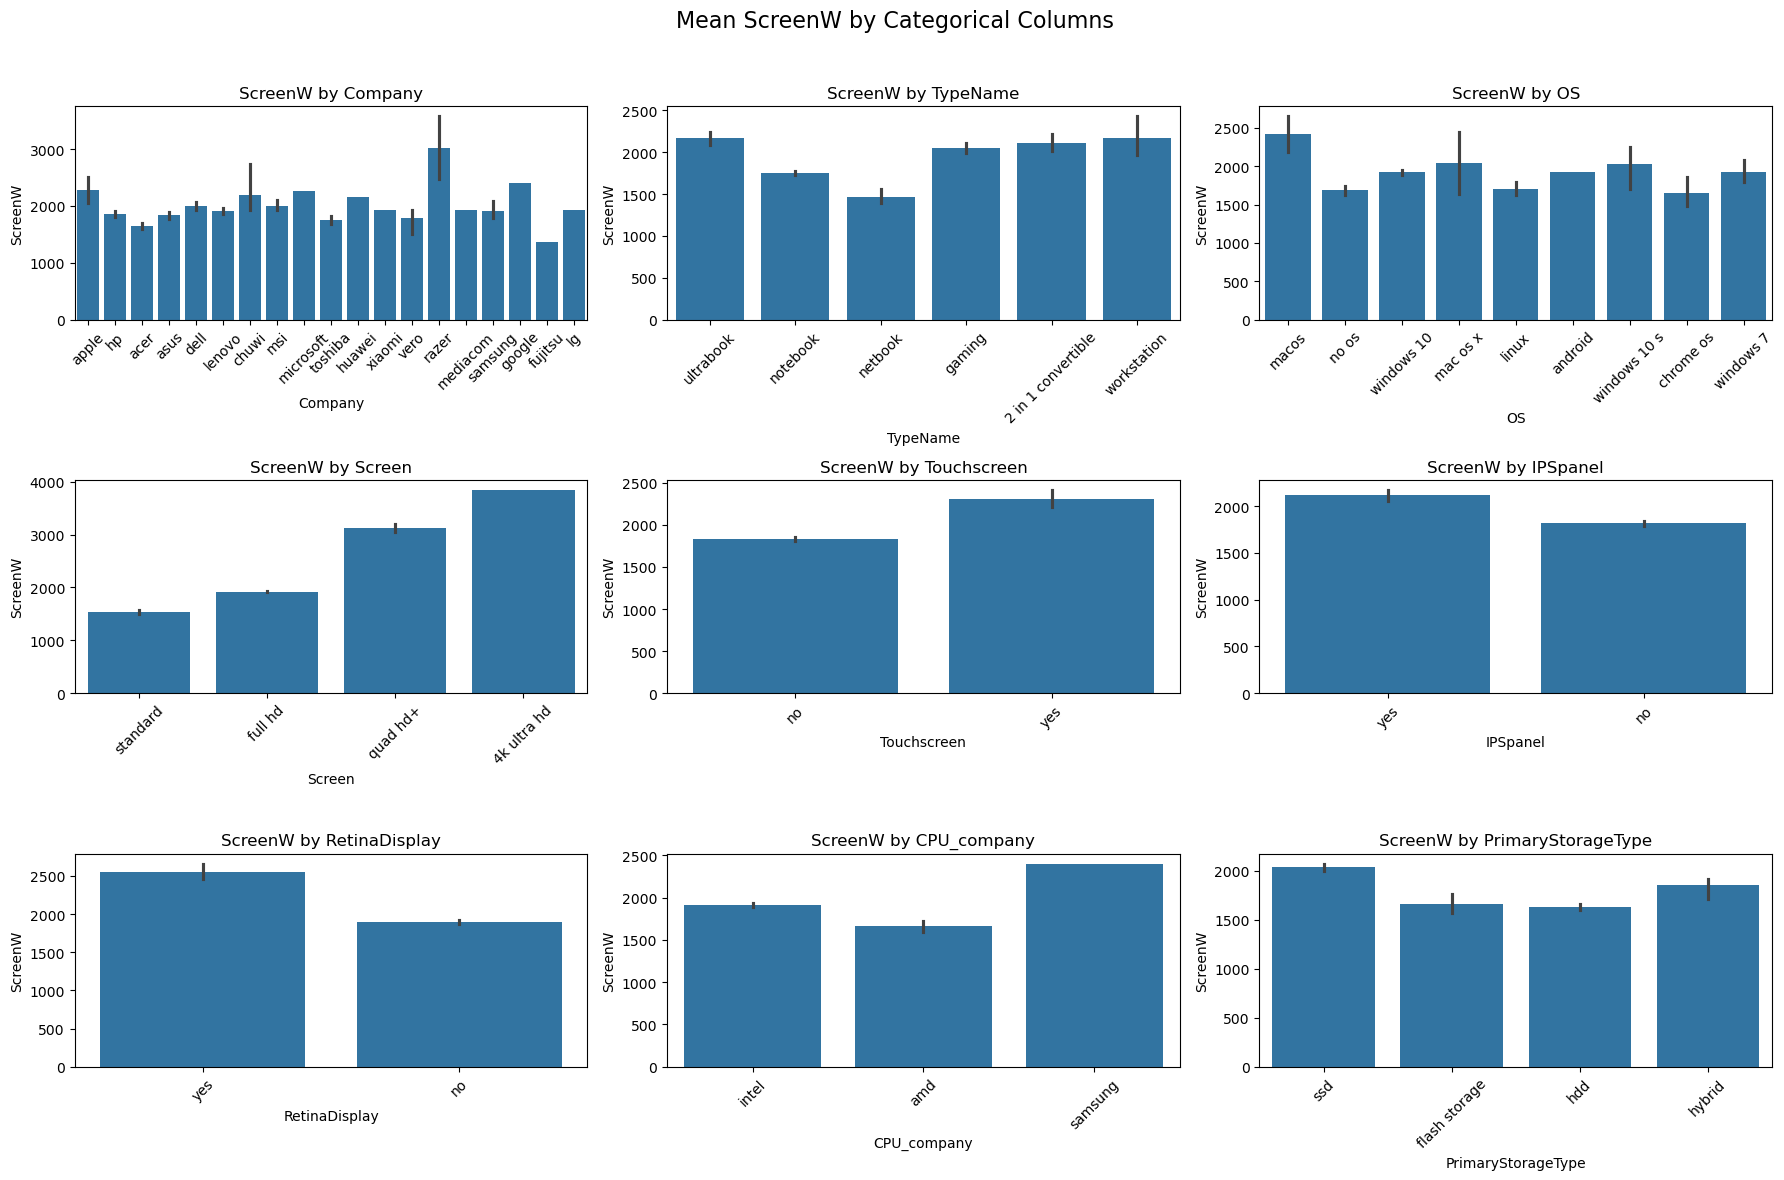

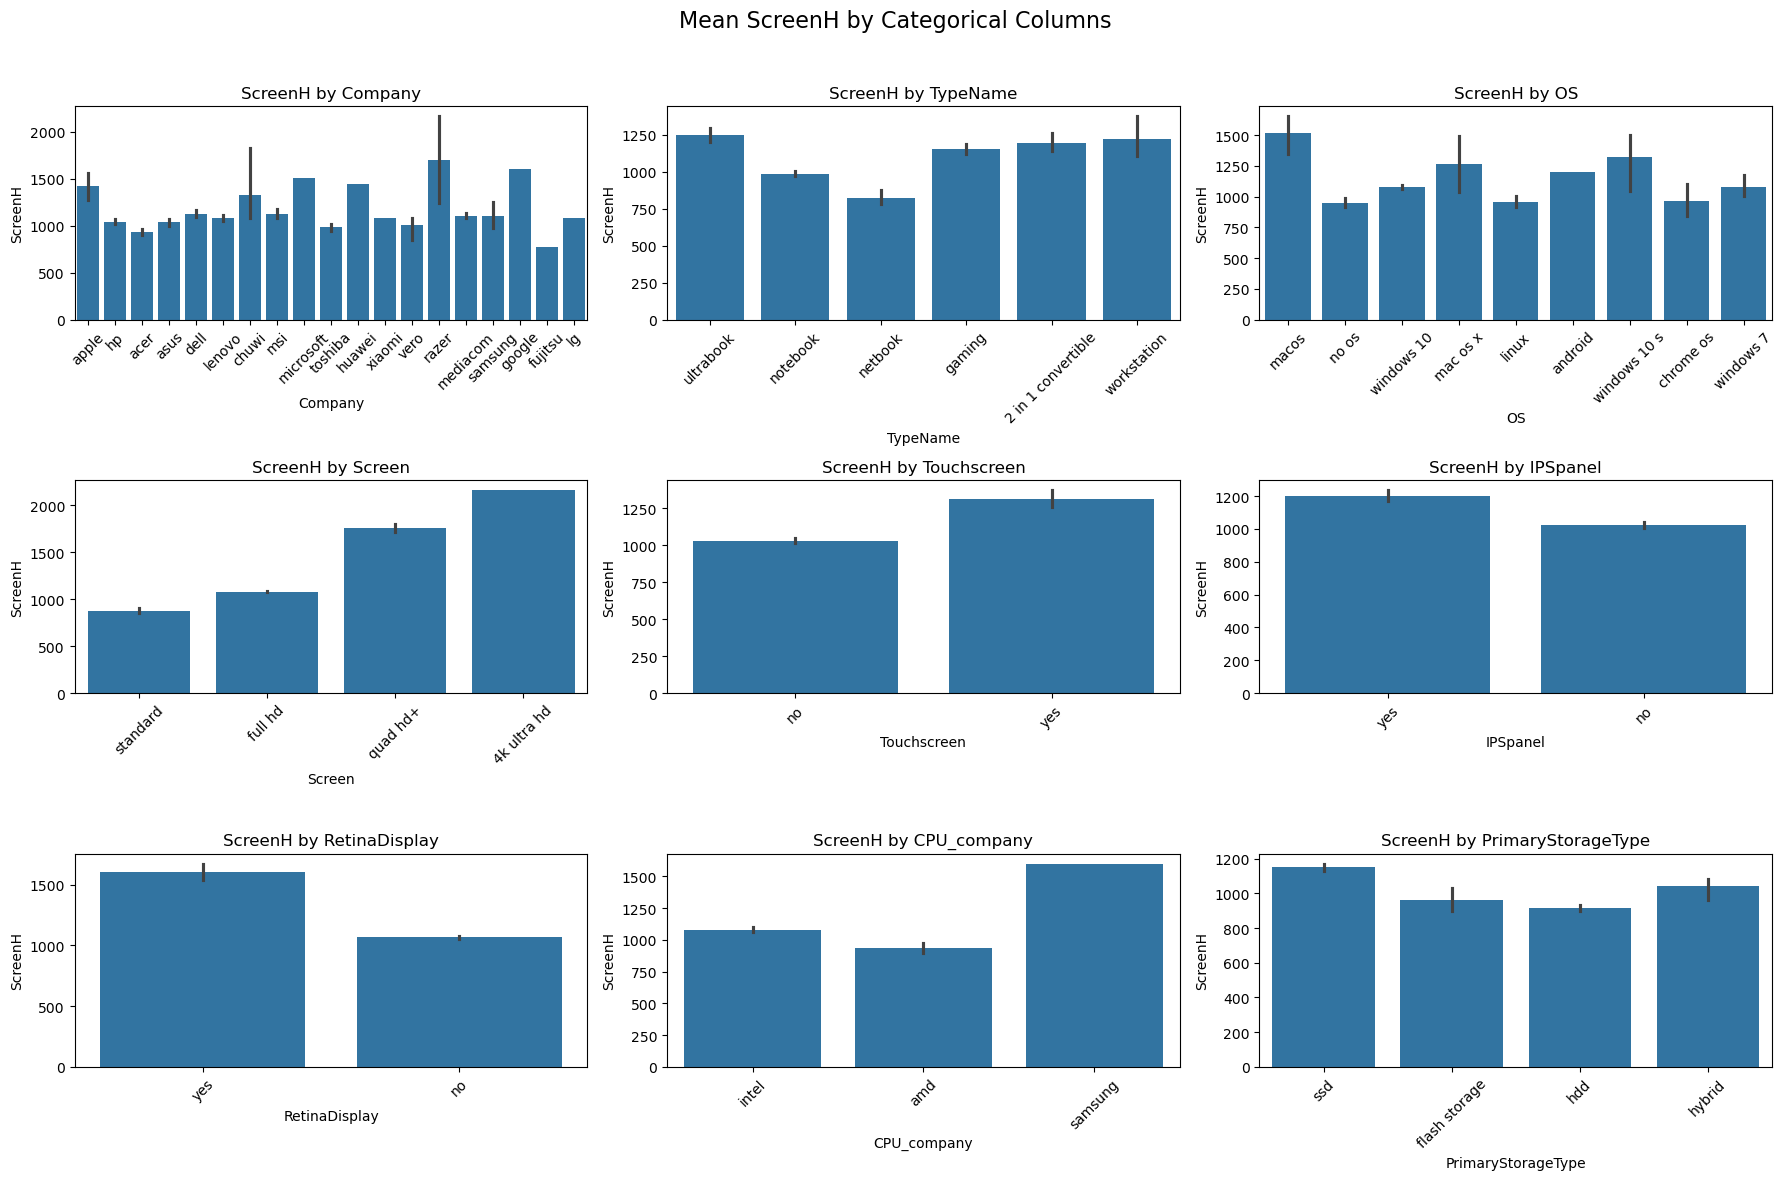

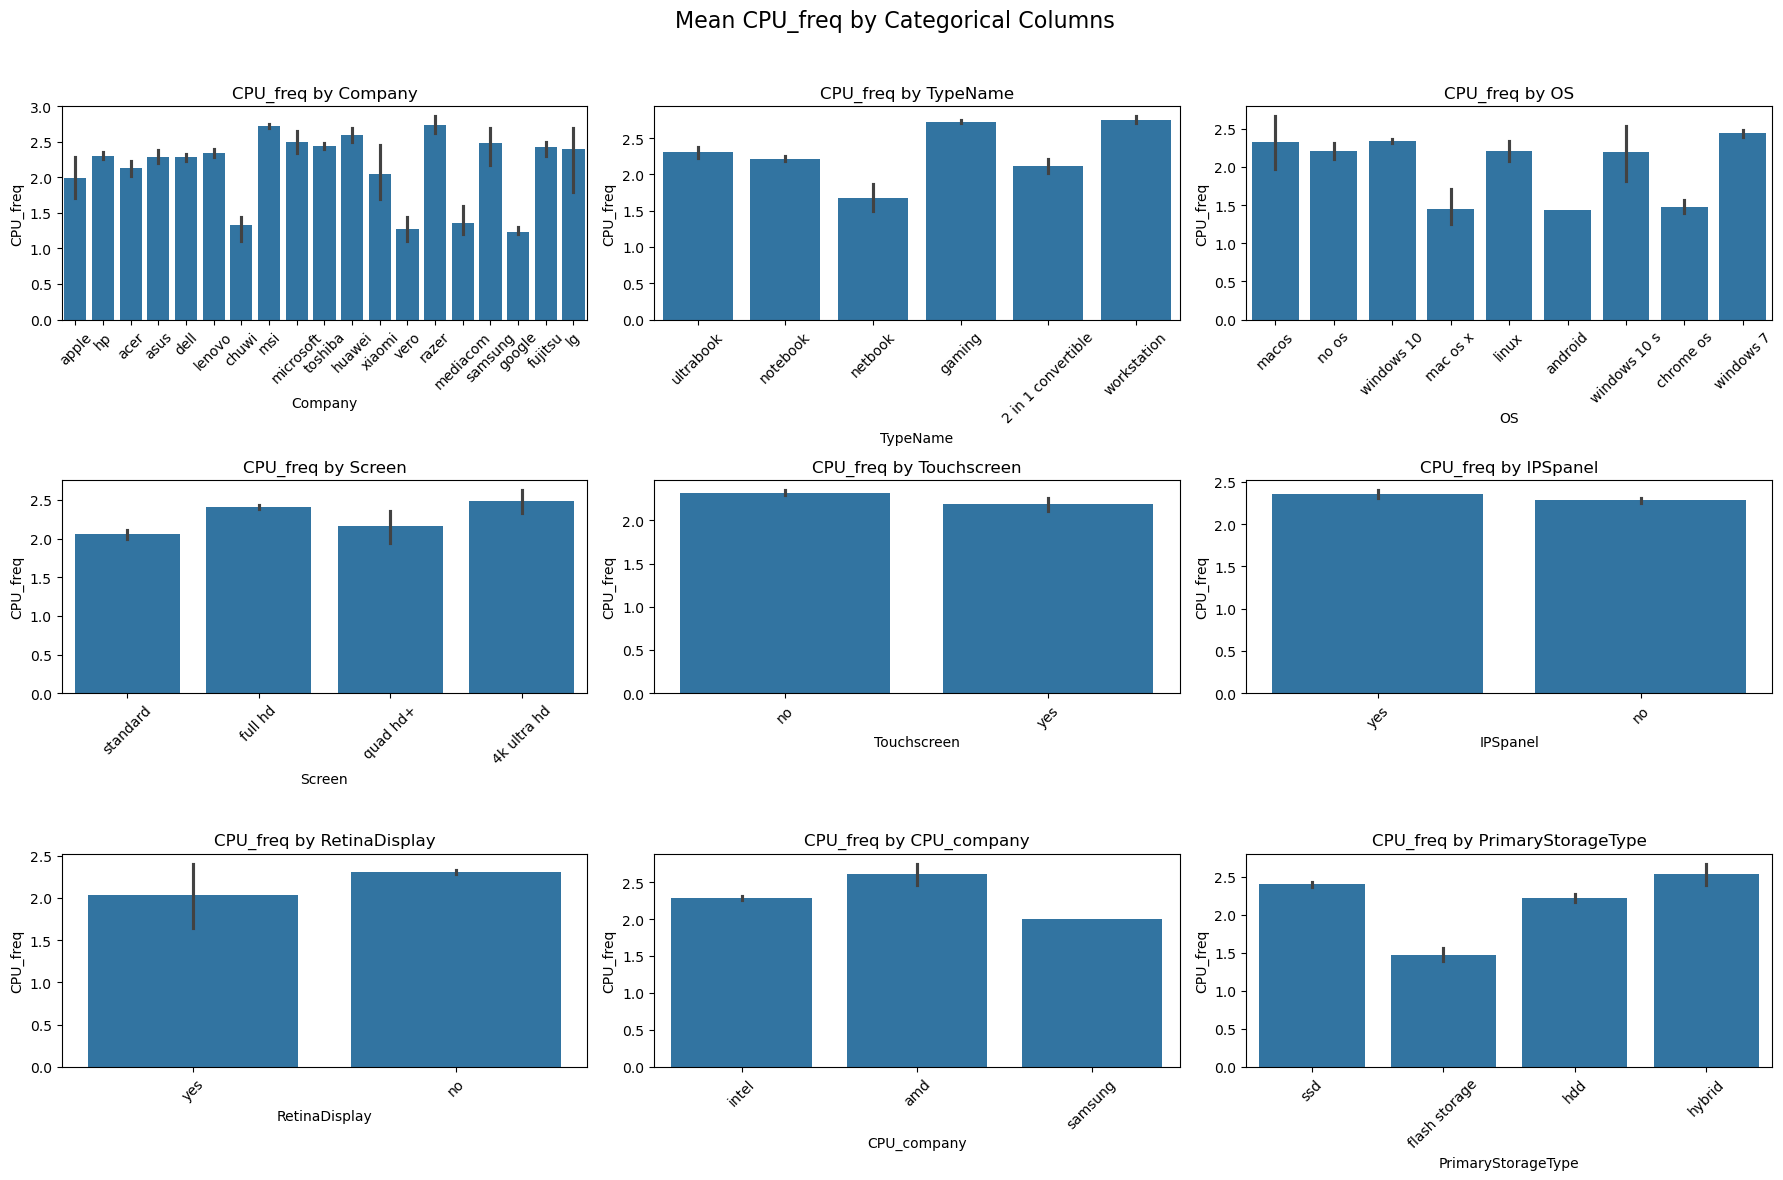

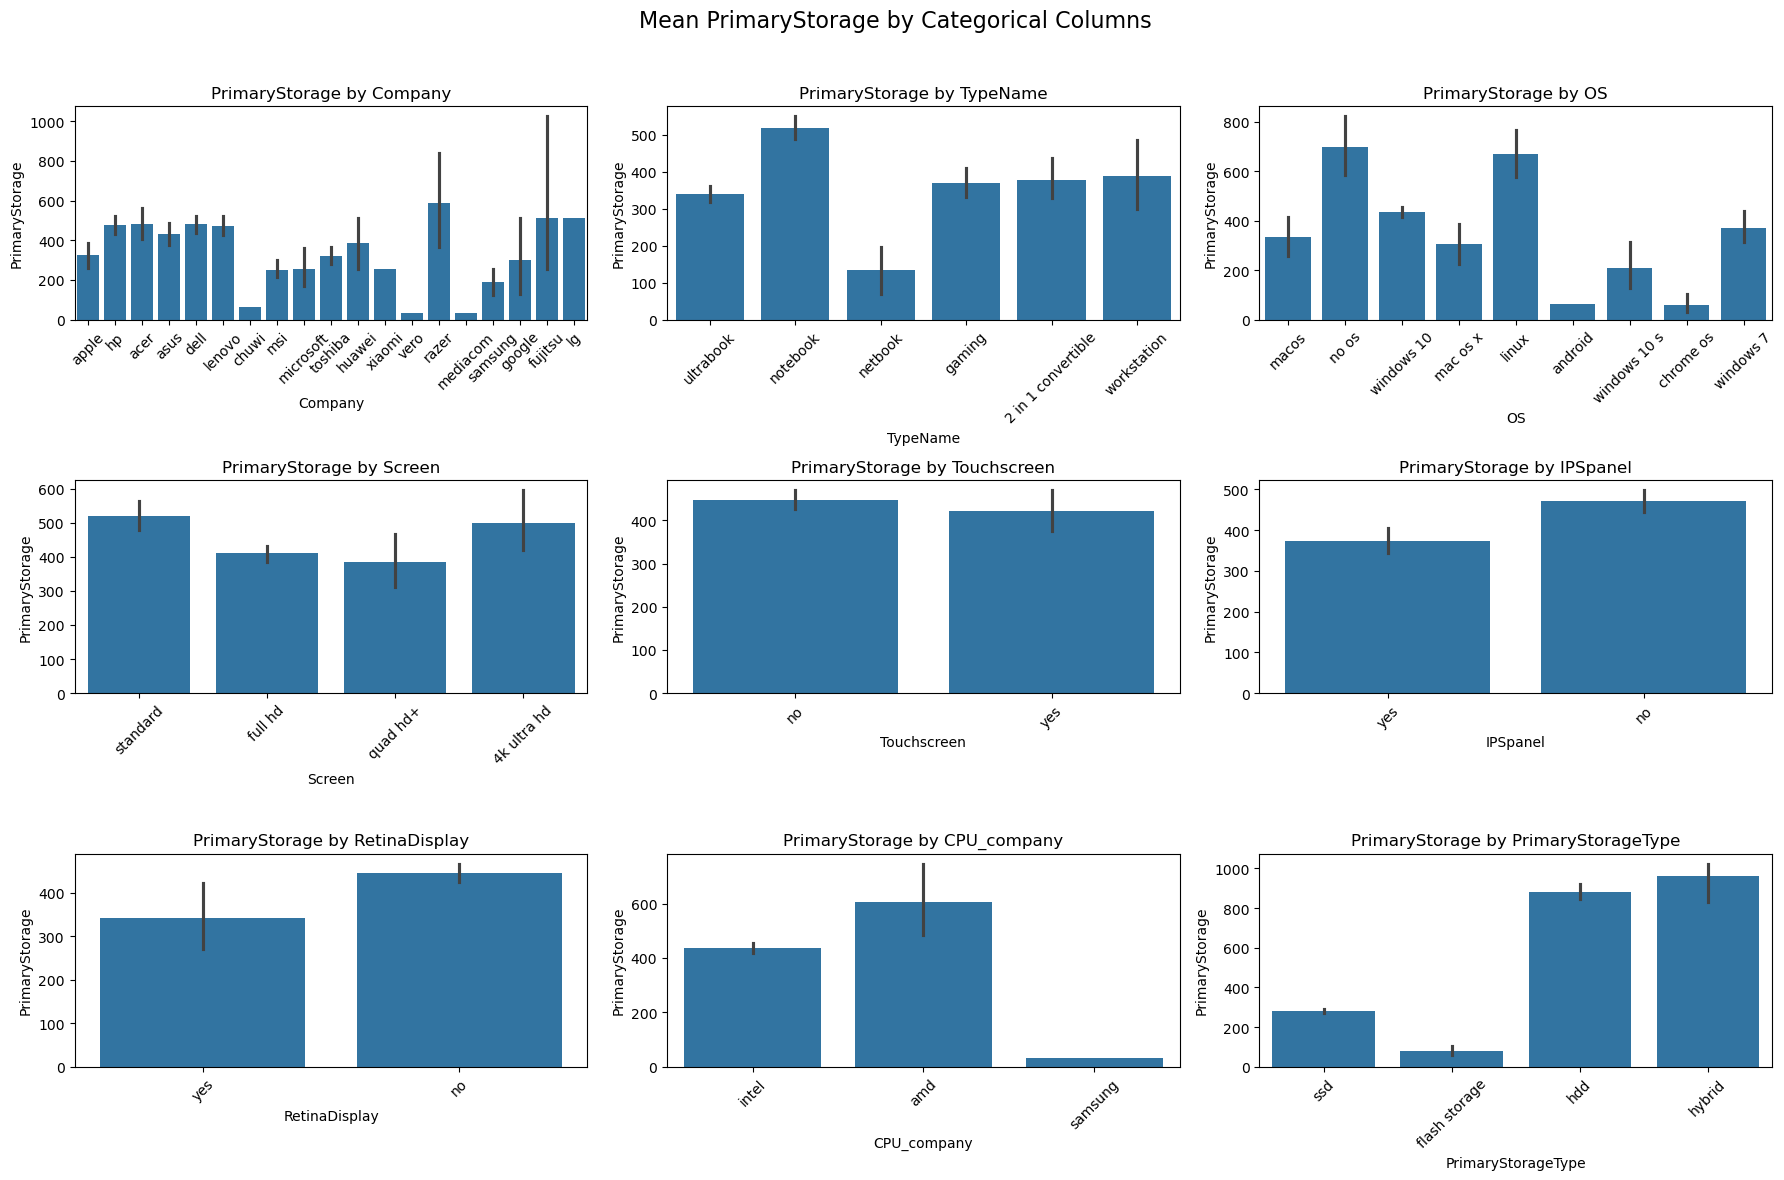

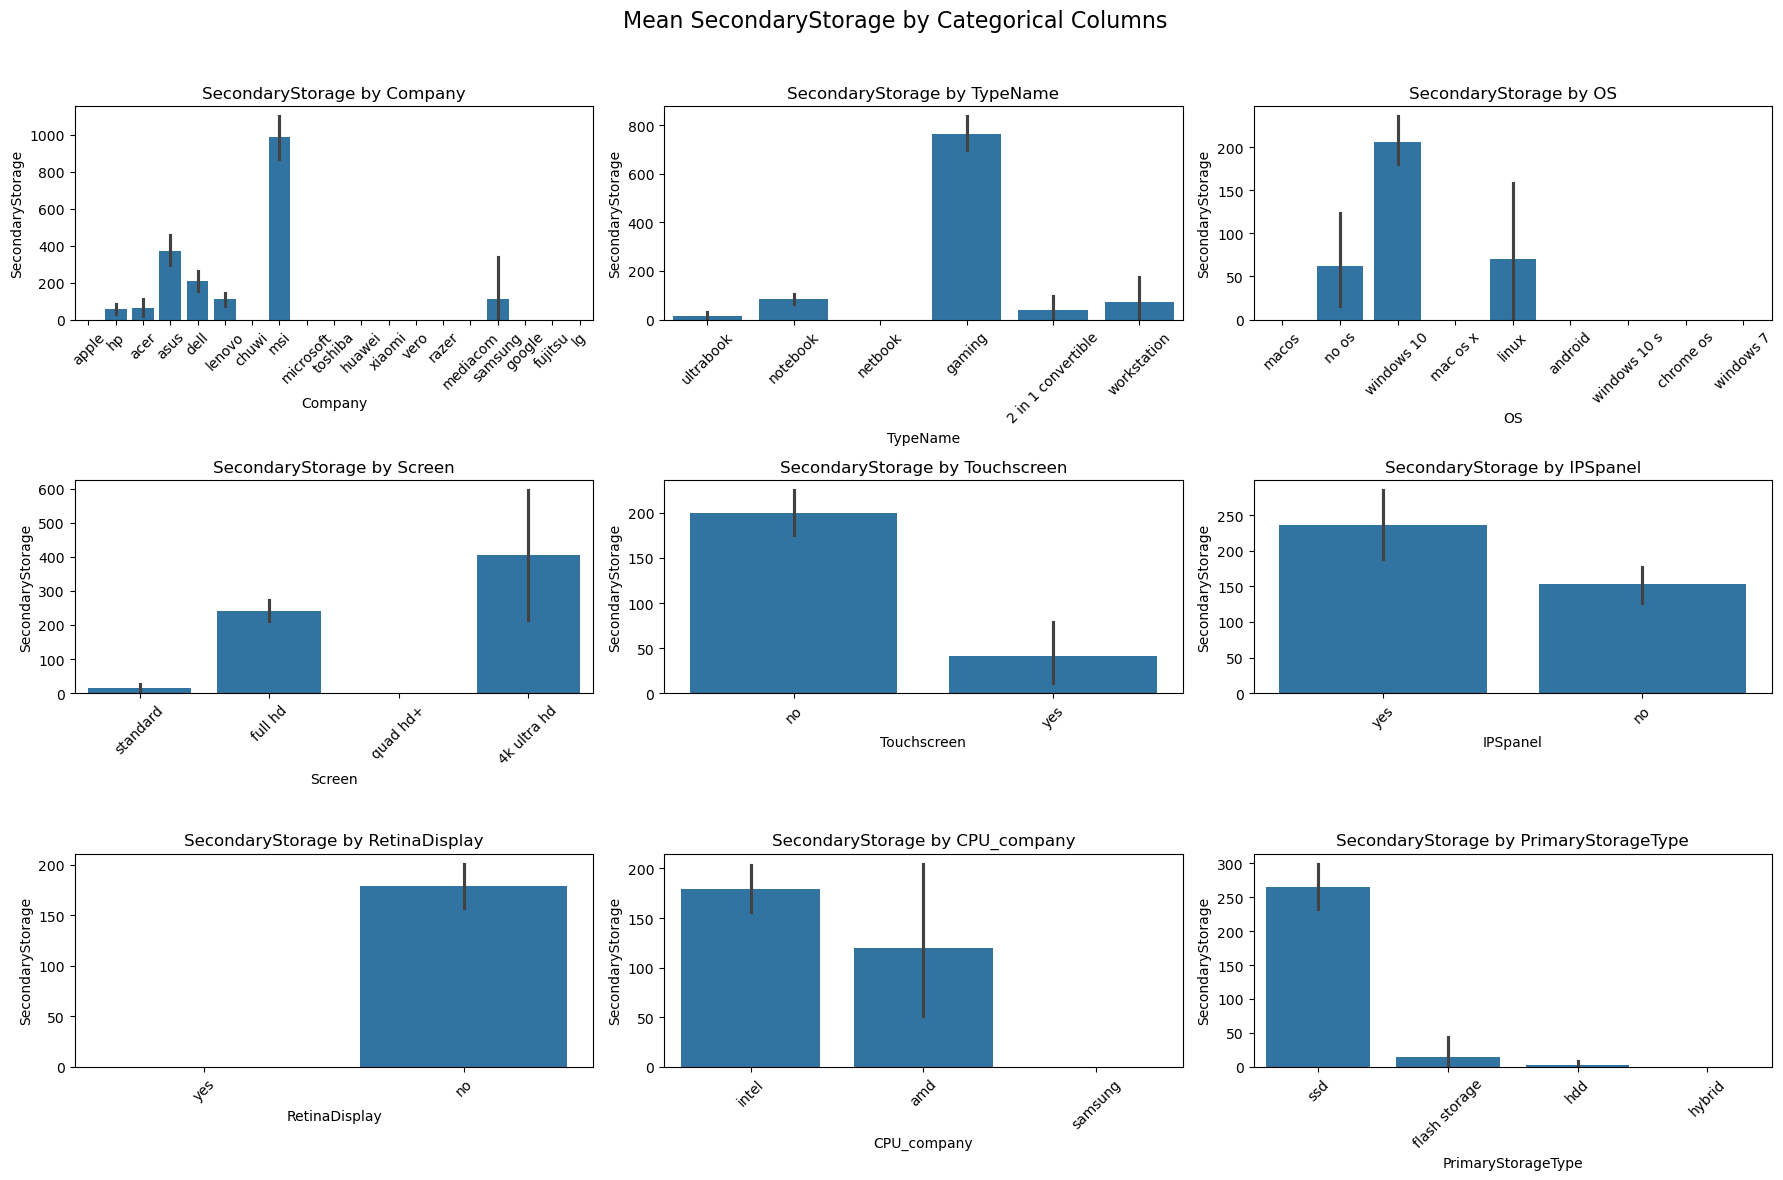

In [23]:
# Bar plot: Show mean of numerical values for each category
for num_col in numerical_columns:
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    fig.suptitle(f'Mean {num_col} by Categorical Columns', fontsize=16)
    
    for i, cat_col in enumerate(categorical_columns[:9]):  # First 9 categorical features
        row, col = divmod(i, 3)
        sns.barplot(data=data, x=cat_col, y=num_col, ax=axes[row, col], estimator='mean')
        axes[row, col].set_title(f'{num_col} by {cat_col}')
        axes[row, col].tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


### 4.3. Multivariate Analysis

#### 4.3.1. Pair plot

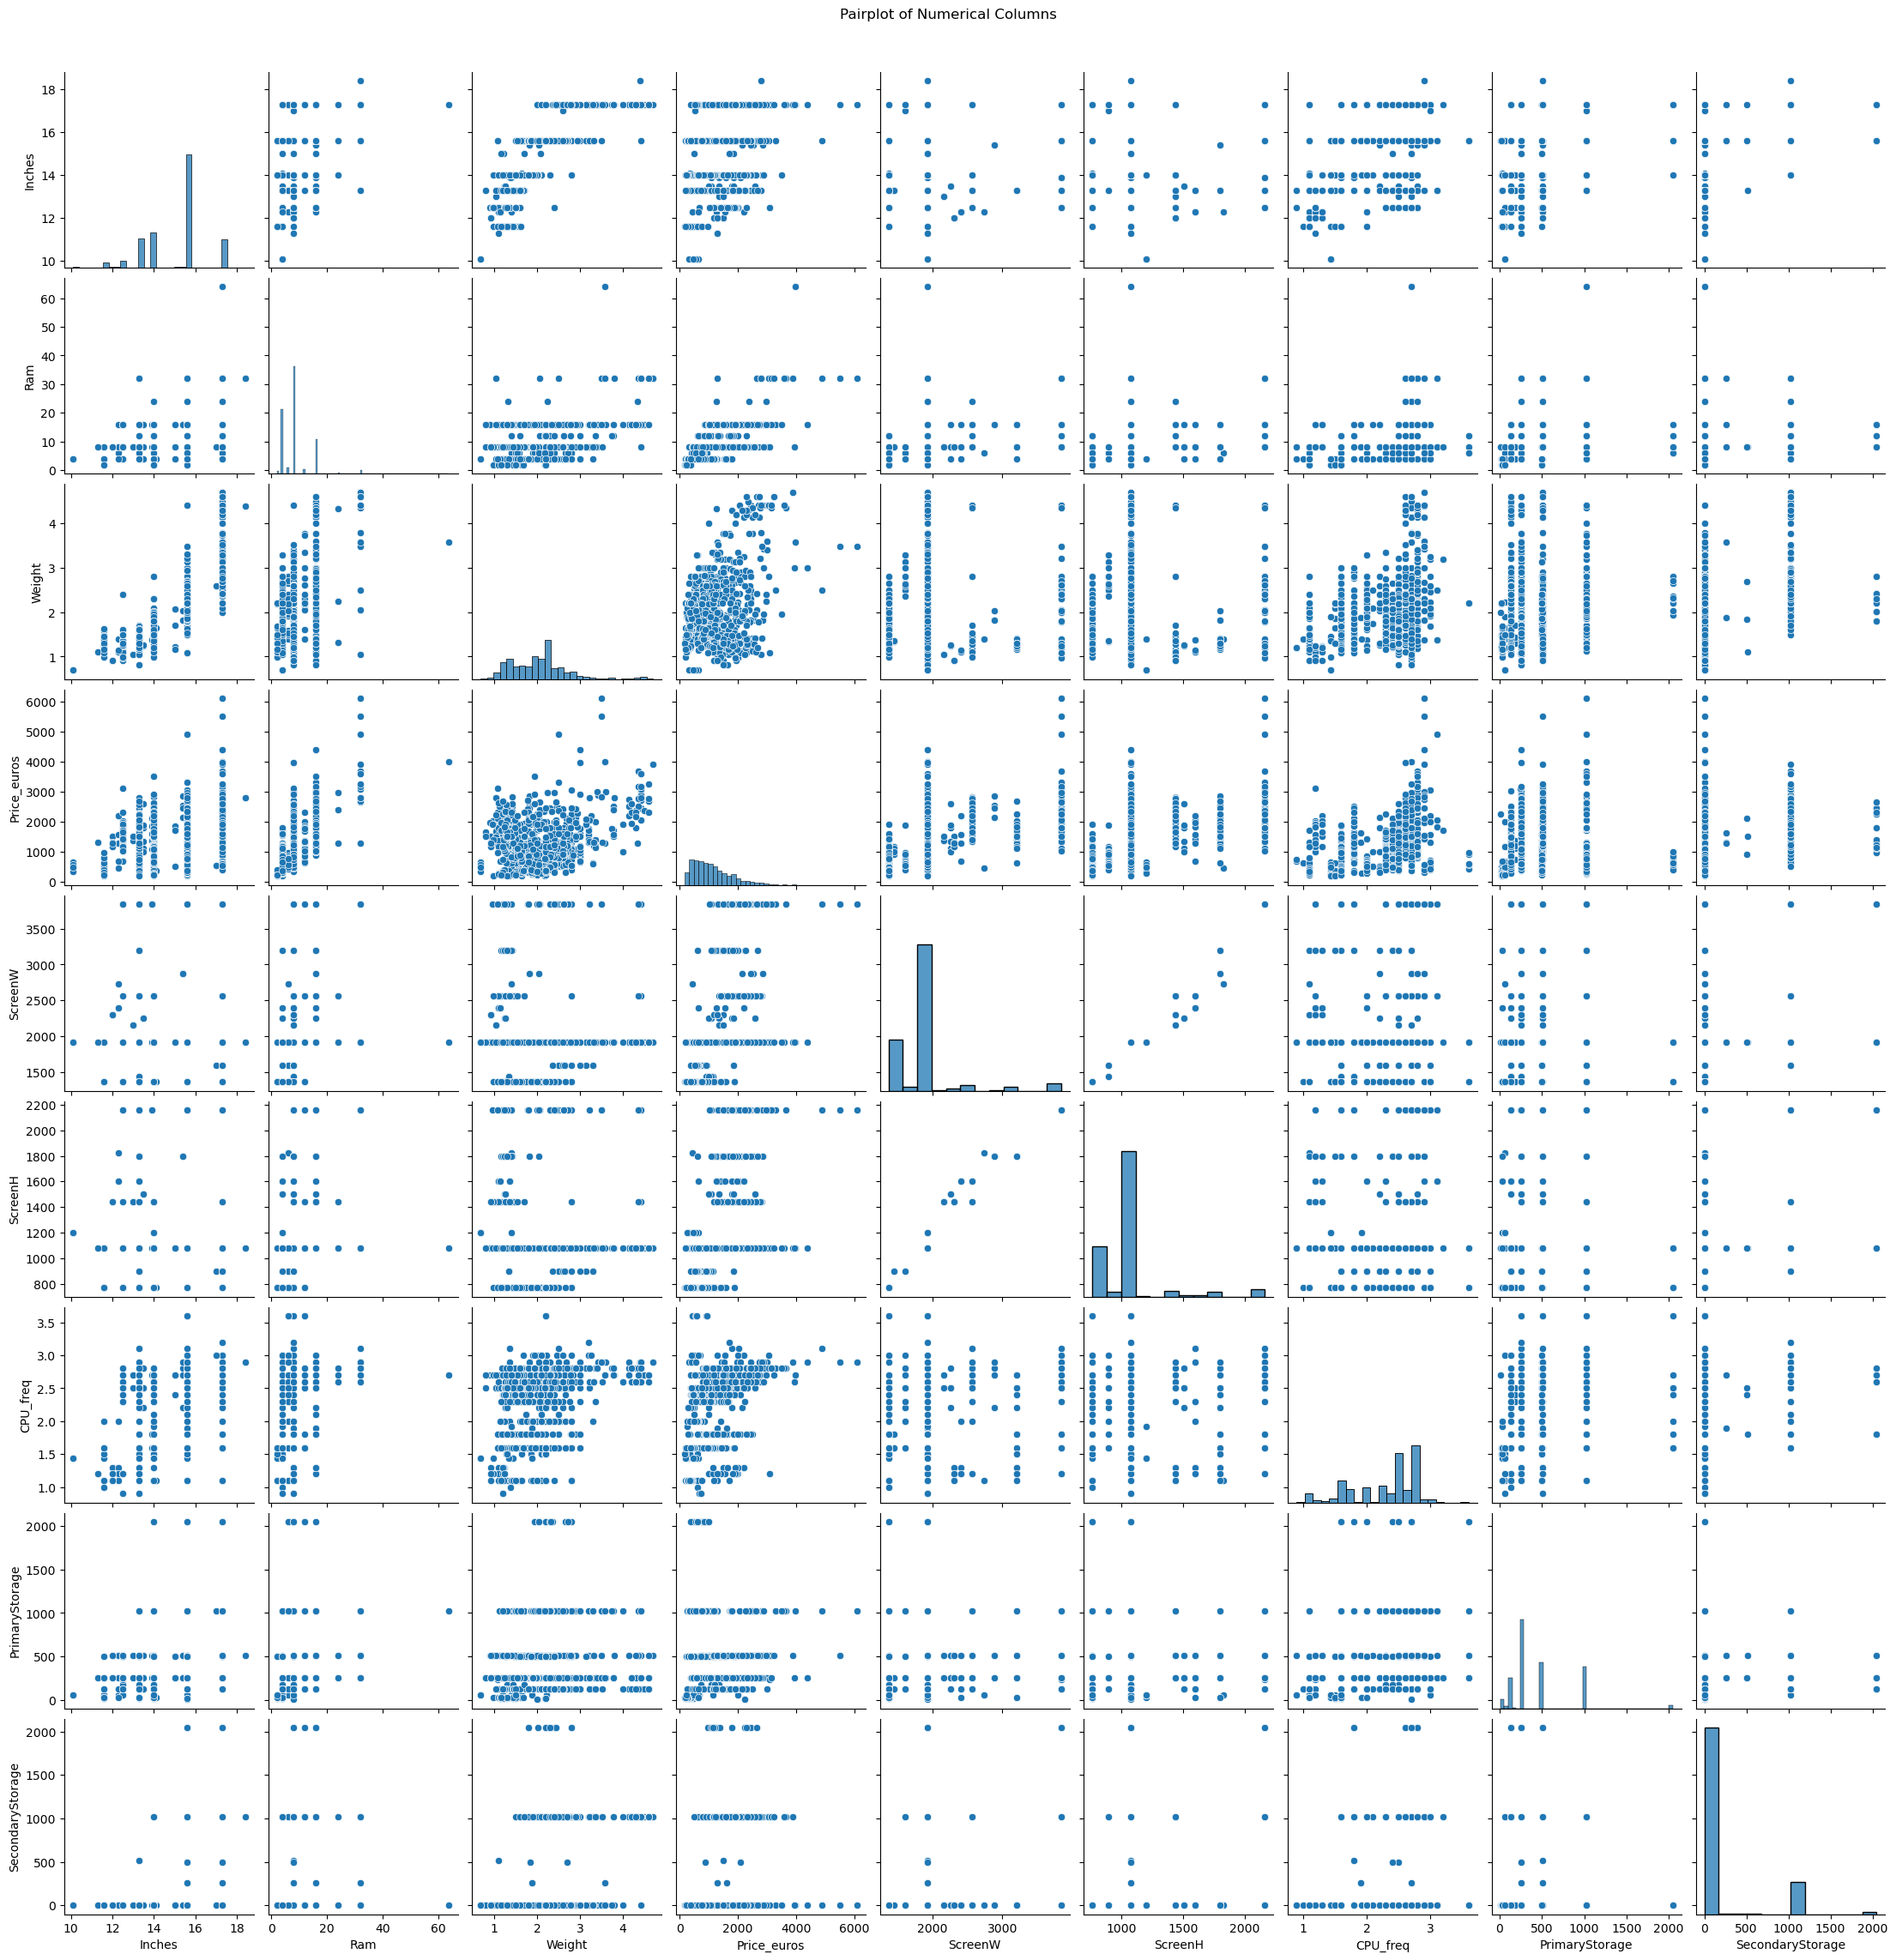

In [24]:
# Pairplot to visualize relationships between numerical columns
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)  # Title with a little space
plt.show()

#### 4.3.2. Violin plot

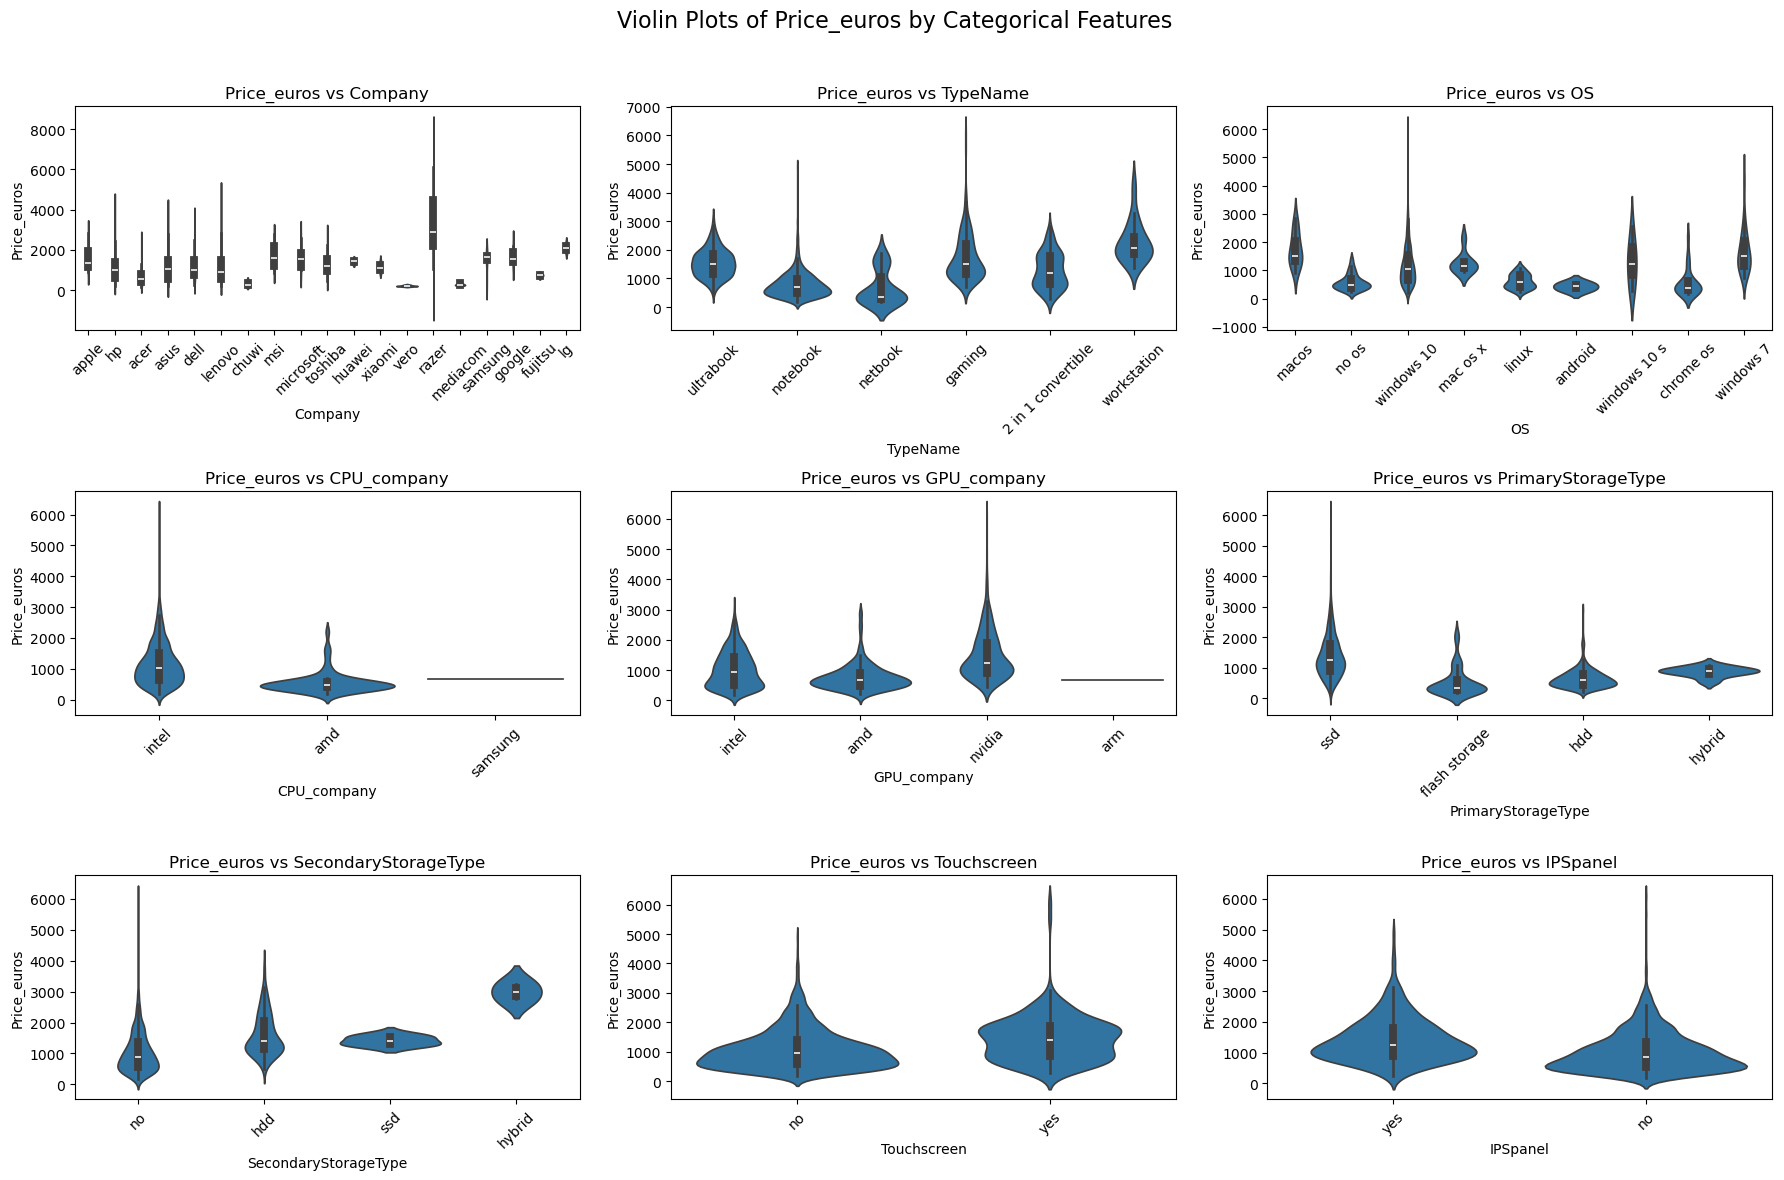

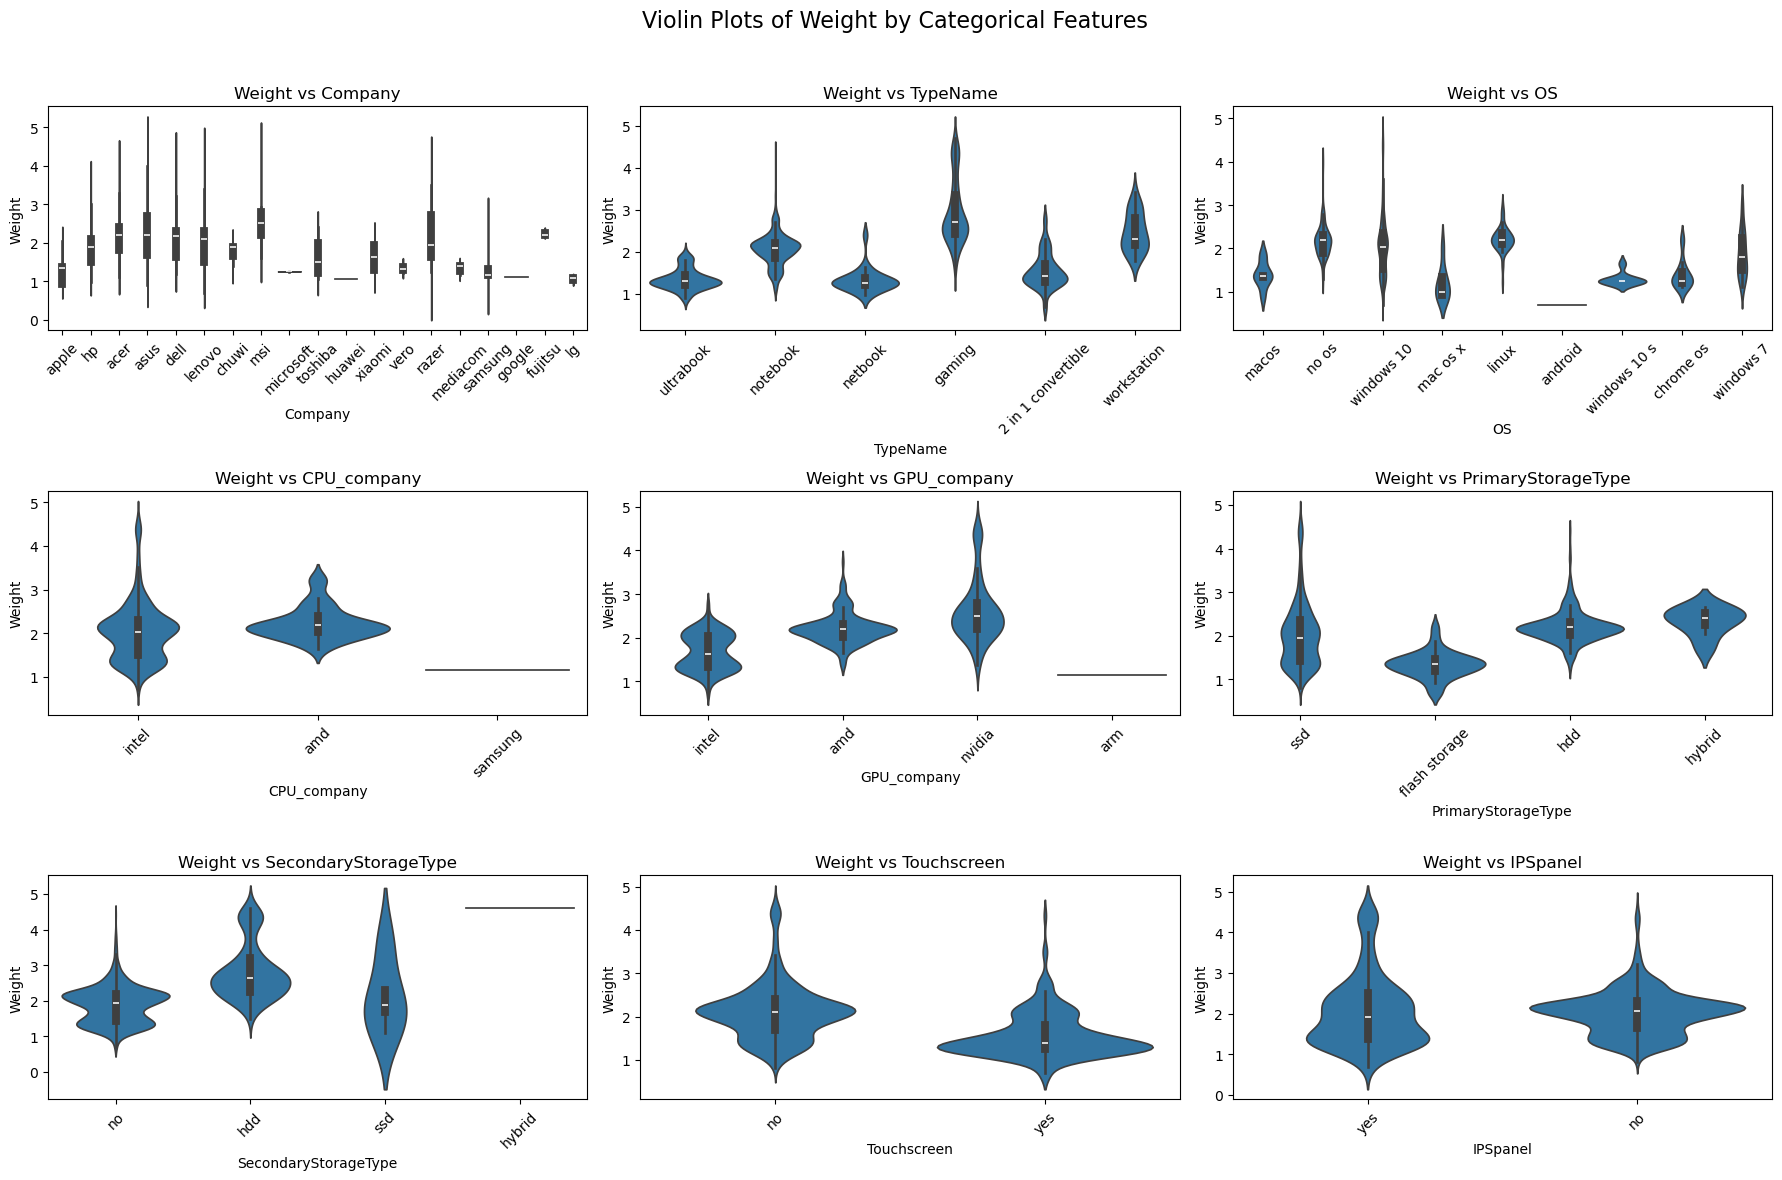

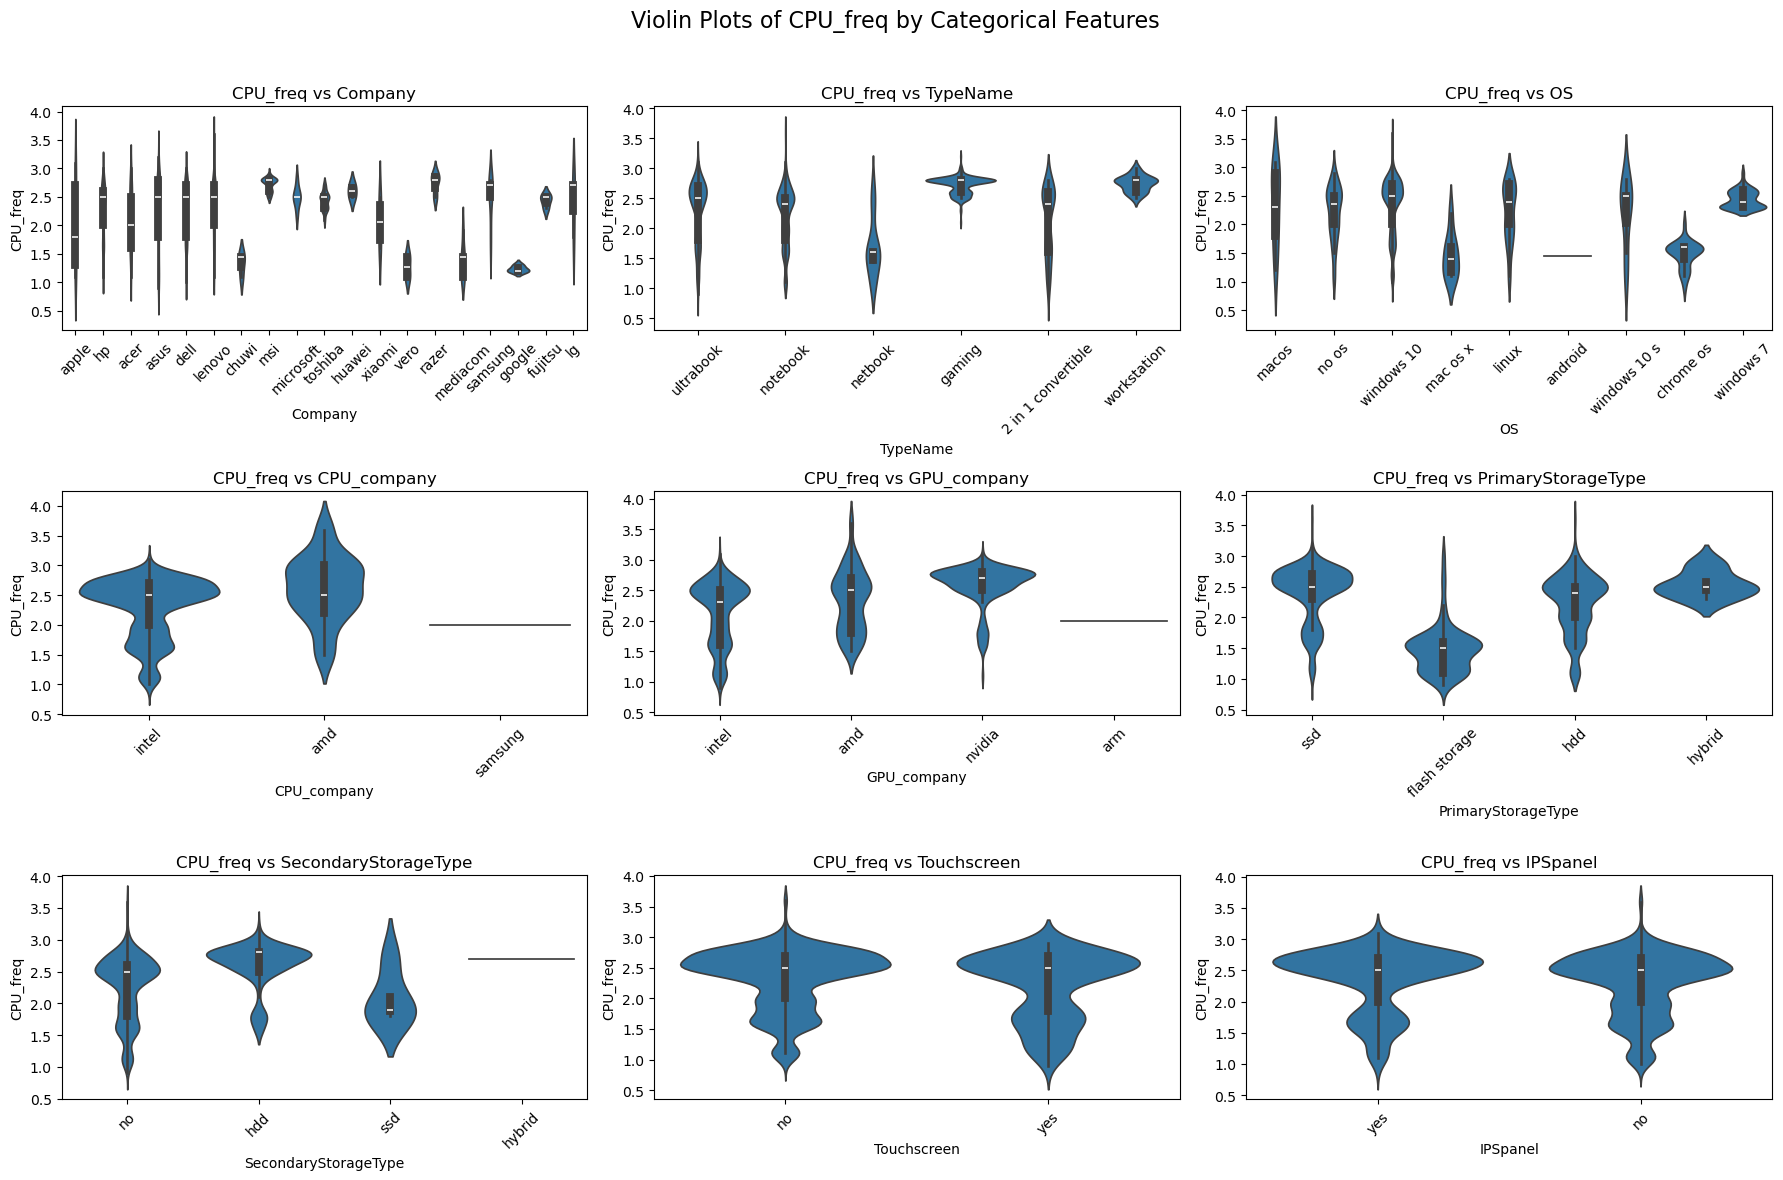

In [25]:
# Categorical and numerical columns
categorical_columns = ['Company', 'TypeName', 'OS', 'CPU_company', 'GPU_company',
                       'PrimaryStorageType', 'SecondaryStorageType', 'Touchscreen', 'IPSpanel']

numerical_columns = ['Price_euros', 'Weight', 'CPU_freq']

# Plot violin plots: Each numerical column across 9 categorical columns
for num_col in numerical_columns:
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    fig.suptitle(f'Violin Plots of {num_col} by Categorical Features', fontsize=16)

    for i, cat_col in enumerate(categorical_columns):
        row, col = divmod(i, 3)
        sns.violinplot(data=data, x=cat_col, y=num_col, ax=axes[row, col])
        axes[row, col].set_title(f'{num_col} vs {cat_col}')
        axes[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Step 5. Feature Enginnering

### 5.1. Feature Creation

In [26]:
# 5.1.1 Screen Resolution (Pixels)
data['Screen_Resolution'] = data['ScreenW'] * data['ScreenH']

In [27]:
# 5.1.2 Pixels per Inch (PPI)
data['PPI'] = ((data['ScreenW']**2 + data['ScreenH']**2) ** 0.5) / data['Inches']

In [28]:
# 5.1.3 Combine Storage Types (Total Storage in GB)
data['Total_Storage'] = data['PrimaryStorage'] + data['SecondaryStorage']

In [29]:
# 5.1.4 Binary Encoding: Touchscreen, IPSpanel, RetinaDisplay
binary_cols = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']
for col in binary_cols:
    data[col] = data[col].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

In [30]:
# 5.1.5 High Performance CPU (based on frequency > 2.5 GHz)
data['High_Perf_CPU'] = data['CPU_freq'].apply(lambda x: 1 if x > 2.5 else 0)

In [31]:
# 5.1.6 Storage Type Flags (SSD, HDD)
data['Has_SSD'] = data['PrimaryStorageType'].apply(lambda x: 1 if 'ssd' in str(x).lower() else 0)
data['Has_HDD'] = data['SecondaryStorageType'].apply(lambda x: 1 if 'hdd' in str(x).lower() else 0)

In [32]:
# 5.1.7 Create Feature: Is_Gaming_Laptop (if has high RAM, GPU, CPU)
data['Is_Gaming_Laptop'] = ((data['Ram'] >= 16) & 
                            (data['High_Perf_CPU'] == 1) & 
                            (data['GPU_company'].str.lower().isin(['nvidia', 'amd']))).astype(int)

In [33]:
# Check new features
data[['Screen_Resolution', 'PPI', 'Total_Storage', 'Has_SSD', 'Has_HDD', 'High_Perf_CPU', 'Is_Gaming_Laptop']].head()

Screen_Resolution         PPI  Total_Storage  Has_SSD  Has_HDD  \
0            4096000  226.983005            128        1        0   
1            1296000  127.677940            128        0        0   
2            2073600  141.211998            256        1        0   
3            5184000  220.534624            512        1        0   
4            4096000  226.983005            256        1        0   

   High_Perf_CPU  Is_Gaming_Laptop  
0              0                 0  
1              0                 0  
2              0                 0  
3              1                 1  
4              1                 0

### 5.2 Feature Transformation

#### 5.2.1 Performing Feature Transformation in Categorical features

In [34]:
# 1. Define feature groups for different encoding methods
one_hot_columns = ['Company', 'TypeName', 'OS','CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']
ordinal_column = 'Screen'
label_encode_columns = ['Product', 'CPU_model', 'GPU_model']

In [35]:
# 2. Ordinal Mapping for 'Screen'
ordinal_mapping = {
    'standard': 1,
    'full hd': 2,
    'quad hd+': 3,
    '4k ultra hd': 4
}

In [36]:
# 4. Perform One-Hot Encoding for one-hot columns
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

In [37]:
# 5. Perform Ordinal Encoding for 'Screen'
data[ordinal_column] = data[ordinal_column].map(ordinal_mapping)

In [38]:
# 6. Perform Label Encoding for high-cardinality features
label_encoder = LabelEncoder()
for col in label_encode_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [39]:
# 7. Check the result
print("Encoded Data:")
data.head()

Encoded Data:


Product  Inches  Ram  Weight  Price_euros  Screen  ScreenW  ScreenH  \
0      289    13.3    8    1.37      1339.69       1     2560     1600   
1      288    13.3    8    1.34       898.94       1     1440      900   
2       50    15.6    8    1.86       575.00       2     1920     1080   
3      289    15.4   16    1.83      2537.45       1     2880     1800   
4      289    13.3    8    1.37      1803.60       1     2560     1600   

   Touchscreen  IPSpanel  ...  CPU_company_samsung  PrimaryStorageType_hdd  \
0            0         1  ...                False                   False   
1            0         0  ...                False                   False   
2            0         0  ...                False                   False   
3            0         1  ...                False                   False   
4            0         1  ...                False                   False   

   PrimaryStorageType_hybrid  PrimaryStorageType_ssd  \
0                      False                    True   
1                      False                   False   
2                      False                    True   
3                      False                    True   
4                      False                    True   

   SecondaryStorageType_hybrid  SecondaryStorageType_no  \
0                        False                     True   
1                        False                     True   
2                        False                     True   
3                        False                     True   
4                        False                     True   

   SecondaryStorageType_ssd  GPU_company_arm  GPU_company_intel  \
0                     False            False               True   
1                     False            False               True   
2                     False            False               True   
3                     False            False              False   
4                     False            False               True   

   GPU_company_nvidia  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 65 columns]

In [40]:
z=data.columns
for col in z:
    print(f"Unique values in {col} column :  ")
    print(data[col].value_counts())

Unique values in Product column :  
Product
539    30
229    25
350    22
50     21
281    19
       ..
217     1
454     1
365     1
323     1
531     1
Name: count, Length: 576, dtype: int64
Unique values in Inches column :  
Inches
15.6    647
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
Unique values in Ram column :  
Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64
Unique values in Weight column :  
Weight
2.20    120
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64
Unique values in Price_euros column :  
Price_euros
1099.0    14
1799.0    14
1499.0    12
1199.0    11
1299.0    11
          ..
2090.0     1
304.0      1
75

In [41]:
# Identify columns with True/False values
boolean_columns = data.select_dtypes(include=['bool']).columns

# Convert True/False to 1/0
for col in boolean_columns:
    data[col] = data[col].astype(int)


#### 5.2.2 Performing Feature Transformations for numerical features

In [42]:
# Calculate skewness for all numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
skewness = data[numerical_features].skew()

# Display skewness
print("Skewness of numerical features:")
print(skewness)

# Identify highly skewed features (e.g., skewness > 1 or < -1)
highly_skewed_features = skewness[abs(skewness) > 1]
print("\nHighly skewed features:")
print(highly_skewed_features)


Skewness of numerical features:
Inches              -0.438622
Ram                  2.698716
Weight               1.150804
Price_euros          1.511147
Screen               0.982464
ScreenW              2.210137
ScreenH              2.117949
Touchscreen          1.991028
IPSpanel             0.981113
RetinaDisplay        8.496076
CPU_freq            -0.838246
PrimaryStorage       1.592866
SecondaryStorage     2.257643
Screen_Resolution    3.153011
PPI                  2.035799
Total_Storage        1.057374
High_Perf_CPU        0.616183
Has_SSD             -0.659758
Has_HDD              1.873070
dtype: float64

Highly skewed features:
Ram                  2.698716
Weight               1.150804
Price_euros          1.511147
ScreenW              2.210137
ScreenH              2.117949
Touchscreen          1.991028
RetinaDisplay        8.496076
PrimaryStorage       1.592866
SecondaryStorage     2.257643
Screen_Resolution    3.153011
PPI                  2.035799
Total_Storage        1.05737

In [43]:
# Features with high skewness
highly_skewed_features = ['Ram', 'Price_euros', 'ScreenW', 'ScreenH','Touchscreen','RetinaDisplay',
                          'PrimaryStorage', 'SecondaryStorage', 'Screen_Resolution','PPI','Has_HDD']

# Apply log transformation to reduce skewness (only for positive values)
for feature in highly_skewed_features:
    if (data[feature] > 0).all():  # Log transformation requires positive values
        data[feature] = np.log1p(data[feature])  # log1p is log(1 + x) to handle 0 safely

# Check skewness again after transformation
new_skewness = data[highly_skewed_features].skew()
print("Skewness after log transformation:")
print(new_skewness)


Skewness after log transformation:
Ram                  0.451535
Price_euros         -0.175626
ScreenW              1.007017
ScreenH              0.994759
Touchscreen          1.991028
RetinaDisplay        8.496076
PrimaryStorage      -0.592654
SecondaryStorage     2.257643
Screen_Resolution    0.995205
PPI                  1.001209
Has_HDD              1.873070
dtype: float64


In [44]:
# Apply square root transformation to moderately skewed features
moderate_skewed_features = ['ScreenW', 'ScreenH', 'Screen_Resolution','PPI']
for feature in moderate_skewed_features:
    data[feature] = np.sqrt(data[feature])

# Apply Box-Cox transformation to highly skewed feature (requires positive values)
# Box-Cox only works for strictly positive values, so ensure no zeros are present
highly_skewed_features = ['Touchscreen', 'RetinaDisplay', 'SecondaryStorage', 'Has_HDD']

# Apply Box-Cox transformation
for feature in highly_skewed_features:
    if (data[feature] > 0).all():
        data[feature], _ = boxcox(data[feature])
    else:
        print(f"Skipped Box-Cox for {feature} (contains non-positive values)")

# Check skewness again after further transformation
final_skewness = data[moderate_skewed_features + highly_skewed_features].skew()
print("Final skewness after additional transformations:")
print(final_skewness)


Skipped Box-Cox for Touchscreen (contains non-positive values)
Skipped Box-Cox for RetinaDisplay (contains non-positive values)
Skipped Box-Cox for SecondaryStorage (contains non-positive values)
Skipped Box-Cox for Has_HDD (contains non-positive values)
Final skewness after additional transformations:
ScreenW              0.931360
ScreenH              0.917367
Screen_Resolution    0.918644
PPI                  0.904363
Touchscreen          1.991028
RetinaDisplay        8.496076
SecondaryStorage     2.257643
Has_HDD              1.873070
dtype: float64


In [45]:
# List of columns to apply the transformation
columns_to_transform = ['Touchscreen', 'RetinaDisplay','SecondaryStorage', 'Has_HDD']

# Handle zeros and apply log1p transformation
for col in columns_to_transform:
    data[col] = data[col].apply(lambda x: x + 1 if x == 0 else x)
    data[col] = np.log1p(data[col])

# Check skewness after transformation
final_skewness = data[columns_to_transform].skew()
print("Skewness after log1p transformation:")
print(final_skewness)

Skewness after log1p transformation:
Touchscreen         0.000000
RetinaDisplay       0.000000
SecondaryStorage    1.833758
Has_HDD             0.000000
dtype: float64


In [46]:
# Select numerical features that need to be standardized
numerical_columns = ['Weight','Product','Inches','Ram','Price_euros','Screen','CPU_model','GPU_model',
                     'CPU_freq', 'ScreenW', 'ScreenH', 'PrimaryStorage', 'SecondaryStorage','Total_Storage','PPI','Screen_Resolution']  # Replace with actual numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected features
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the result
data[numerical_columns].head()


Weight   Product    Inches       Ram  Price_euros    Screen  CPU_model  \
0 -1.002380 -0.021034 -1.205746  0.138005     0.562530 -1.255105  -0.779839   
1 -1.047227 -0.027331 -1.205746  0.138005    -0.081775 -1.255105  -0.779839   
2 -0.269871 -1.526017  0.403873  0.138005    -0.803032  0.313776  -0.399926   
3 -0.314718 -0.021034  0.263906  1.539590     1.594371 -1.255105   0.106624   
4 -1.002380 -0.021034 -1.205746  0.138005     1.042842 -1.255105  -0.779839   

   GPU_model  CPU_freq   ScreenW   ScreenH  PrimaryStorage  SecondaryStorage  \
0   0.340992 -0.005918  1.455606  1.864313       -1.045294         -0.441055   
1   0.113108 -0.998674 -1.127077 -0.650093       -1.045294         -0.441055   
2   0.189069  0.391185  0.176448  0.157653       -0.253157         -0.441055   
3   1.100606  0.788288  1.972590  2.366941        0.541206         -0.441055   
4   0.378973  1.582493  1.455606  1.864313       -0.253157         -0.441055   

   Total_Storage       PPI  Screen_Resolution  
0      -1.022229  1.861895           1.664316  
1      -1.022229 -0.419949          -0.887017  
2      -0.756600 -0.011644           0.167202  
3      -0.225342  1.750378           2.174572  
4      -0.756600  1.861895           1.664316

In [47]:
# Check the mean and std deviation of the standardized columns
print(data[numerical_columns].mean())  # Should be close to 0
print(data[numerical_columns].std())   # Should be close to 1


Weight              -1.504679e-16
Product              1.546475e-16
Inches               1.426658e-15
Ram                  1.003119e-16
Price_euros          2.039676e-15
Screen              -4.736952e-17
CPU_model            2.061967e-16
GPU_model           -6.687461e-17
CPU_freq            -6.687461e-17
ScreenW              1.044637e-14
ScreenH              1.833200e-14
PrimaryStorage       7.739343e-16
SecondaryStorage     1.839052e-16
Total_Storage       -6.130173e-17
PPI                  1.074173e-15
Screen_Resolution    1.170306e-16
dtype: float64
Weight               1.000392
Product              1.000392
Inches               1.000392
Ram                  1.000392
Price_euros          1.000392
Screen               1.000392
CPU_model            1.000392
GPU_model            1.000392
CPU_freq             1.000392
ScreenW              1.000392
ScreenH              1.000392
PrimaryStorage       1.000392
SecondaryStorage     1.000392
Total_Storage        1.000392
PPI                  

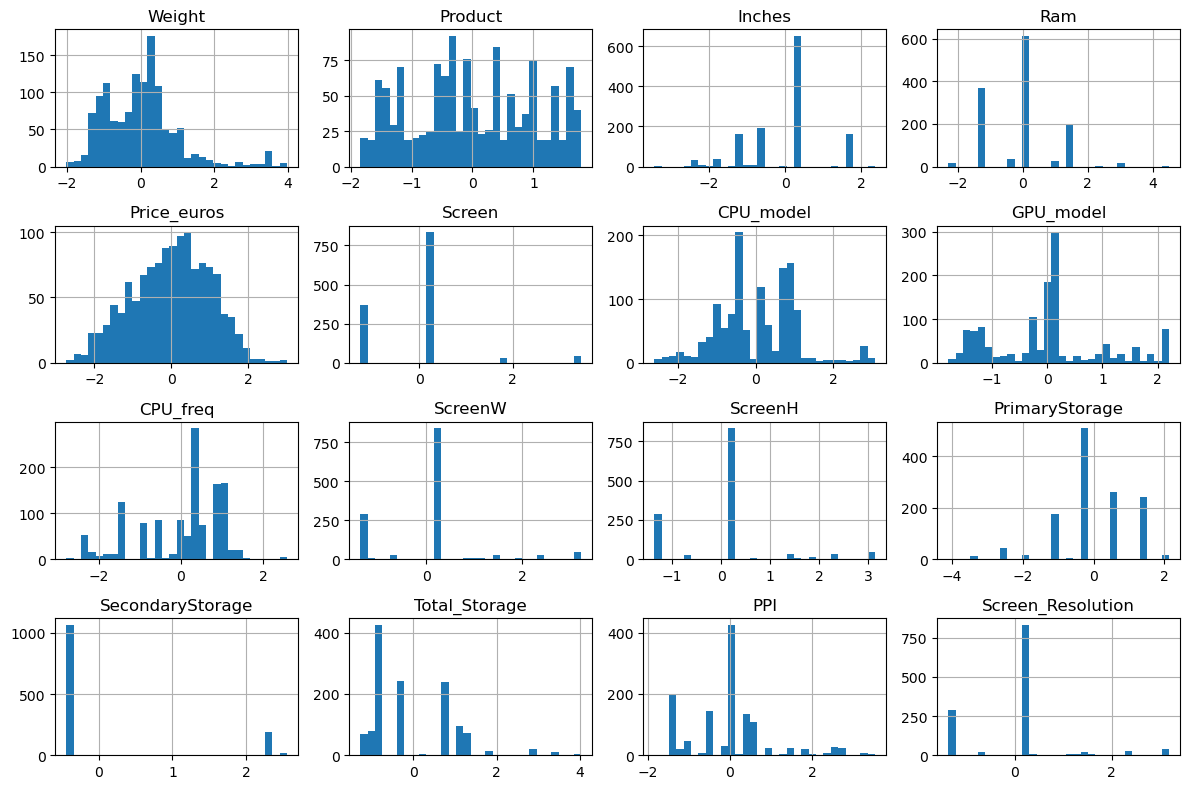

In [48]:
# Double check the data
# Plot histograms of the standardized features
numerical_columns = ['Weight','Product','Inches','Ram','Price_euros','Screen','CPU_model','GPU_model',
                     'CPU_freq', 'ScreenW', 'ScreenH', 'PrimaryStorage', 'SecondaryStorage','Total_Storage','PPI','Screen_Resolution'] 
data[numerical_columns].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [49]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected features
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the result
data[numerical_columns].head()


Weight   Product    Inches       Ram  Price_euros    Screen  CPU_model  \
0  0.169576  0.502609  0.385542  0.357182     0.573361  0.000000   0.322222   
1  0.162095  0.500870  0.385542  0.357182     0.461116  0.000000   0.322222   
2  0.291771  0.086957  0.662651  0.357182     0.335465  0.333333   0.388889   
3  0.284289  0.502609  0.638554  0.563956     0.753120  0.000000   0.477778   
4  0.169576  0.502609  0.385542  0.357182     0.657037  0.000000   0.322222   

   GPU_model  CPU_freq   ScreenW   ScreenH  PrimaryStorage  SecondaryStorage  \
0   0.533333  0.518519  0.615566  0.717033        0.490539               0.0   
1   0.476190  0.333333  0.052697  0.158126        0.490539               0.0   
2   0.495238  0.592593  0.336787  0.337674        0.617525               0.0   
3   0.723810  0.666667  0.728237  0.828758        0.744867               0.0   
4   0.542857  0.814815  0.615566  0.717033        0.617525               0.0   

   Total_Storage       PPI  Screen_Resolution  
0       0.047022  0.689289           0.666481  
1       0.047022  0.264502           0.105501  
2       0.097179  0.340512           0.337300  
3       0.197492  0.668529           0.778675  
4       0.097179  0.689289           0.666481

In [50]:
data.columns

Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage',
       'GPU_model', 'Screen_Resolution', 'PPI', 'Total_Storage',
       'High_Perf_CPU', 'Has_SSD', 'Has_HDD', 'Is_Gaming_Laptop',
       'Company_apple', 'Company_asus', 'Company_chuwi', 'Company_dell',
       'Company_fujitsu', 'Company_google', 'Company_hp', 'Company_huawei',
       'Company_lenovo', 'Company_lg', 'Company_mediacom', 'Company_microsoft',
       'Company_msi', 'Company_razer', 'Company_samsung', 'Company_toshiba',
       'Company_vero', 'Company_xiaomi', 'TypeName_gaming', 'TypeName_netbook',
       'TypeName_notebook', 'TypeName_ultrabook', 'TypeName_workstation',
       'OS_chrome os', 'OS_linux', 'OS_mac os x', 'OS_macos', 'OS_no os',
       'OS_windows 10', 'OS_windows 10 s', 'OS_windows 7', 'CPU_company_intel',
       'CPU_company_samsung', 'PrimaryStor

### 5.3. Feature Selection 

In [51]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set the threshold for correlation (e.g., 0.9)
threshold = 0.9

# Find the pairs of features with correlation greater than the threshold
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  # Get the column name
            high_corr_features.add(colname)

# Drop highly correlated features
data.drop(columns=high_corr_features, inplace=True)

# Check the result
print("Remaining columns after removing highly correlated features:")
print(data.columns)

Remaining columns after removing highly correlated features:
Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_freq',
       'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'GPU_model',
       'Total_Storage', 'High_Perf_CPU', 'Has_SSD', 'Has_HDD',
       'Is_Gaming_Laptop', 'Company_apple', 'Company_asus', 'Company_chuwi',
       'Company_dell', 'Company_fujitsu', 'Company_google', 'Company_hp',
       'Company_huawei', 'Company_lenovo', 'Company_lg', 'Company_mediacom',
       'Company_microsoft', 'Company_msi', 'Company_razer', 'Company_samsung',
       'Company_toshiba', 'Company_vero', 'Company_xiaomi', 'TypeName_gaming',
       'TypeName_netbook', 'TypeName_notebook', 'TypeName_ultrabook',
       'TypeName_workstation', 'OS_chrome os', 'OS_linux', 'OS_mac os x',
       'OS_macos', 'OS_no os', 'OS_windows 10', 'OS_windows 10 s',
       'OS_windows 7', 'CPU_company_intel', 'CPU_company_samsung

In [52]:
# Remove constant features (features where all values are the same)
data = data.loc[:, data.nunique() > 1]

# Remove duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Check the result
print("Remaining columns after removing constant and duplicate features:")
print(data.columns)

Remaining columns after removing constant and duplicate features:
Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'IPSpanel', 'CPU_freq', 'CPU_model', 'PrimaryStorage',
       'SecondaryStorage', 'GPU_model', 'Total_Storage', 'High_Perf_CPU',
       'Has_SSD', 'Is_Gaming_Laptop', 'Company_apple', 'Company_asus',
       'Company_chuwi', 'Company_dell', 'Company_fujitsu', 'Company_google',
       'Company_hp', 'Company_huawei', 'Company_lenovo', 'Company_lg',
       'Company_mediacom', 'Company_microsoft', 'Company_msi', 'Company_razer',
       'Company_samsung', 'Company_toshiba', 'Company_vero', 'Company_xiaomi',
       'TypeName_gaming', 'TypeName_netbook', 'TypeName_notebook',
       'TypeName_ultrabook', 'TypeName_workstation', 'OS_chrome os',
       'OS_linux', 'OS_mac os x', 'OS_macos', 'OS_no os', 'OS_windows 10',
       'OS_windows 10 s', 'OS_windows 7', 'CPU_company_intel',
       'CPU_company_samsung', 'PrimaryStorageType_hdd',
       'P

In [53]:
# Example: Drop the first category for each one-hot encoded feature
company_columns = ['Company_apple', 'Company_asus', 'Company_chuwi', 'Company_dell', 'Company_fujitsu',
                   'Company_google', 'Company_hp', 'Company_huawei', 'Company_lenovo', 'Company_lg',
                   'Company_mediacom', 'Company_microsoft', 'Company_msi', 'Company_razer', 'Company_samsung',
                   'Company_toshiba', 'Company_vero', 'Company_xiaomi']
type_columns = ['TypeName_gaming', 'TypeName_netbook', 'TypeName_notebook', 'TypeName_ultrabook', 'TypeName_workstation']
os_columns = ['OS_chrome os', 'OS_linux', 'OS_mac os x', 'OS_macos', 'OS_no os', 'OS_windows 10', 'OS_windows 10 s', 'OS_windows 7']
cpu_company_columns = ['CPU_company_intel', 'CPU_company_samsung']
primary_storage_type_columns = ['PrimaryStorageType_hdd', 'PrimaryStorageType_hybrid', ]
secondary_storage_type_columns = ['SecondaryStorageType_hybrid',  'SecondaryStorageType_ssd']
gpu_company_columns = ['GPU_company_intel', 'GPU_company_nvidia']

# Remove one column from each set of dummy variables (one-hot encoding)
columns_to_remove = company_columns[1:] + type_columns[1:] + os_columns[1:] + cpu_company_columns[1:] + primary_storage_type_columns[1:] + secondary_storage_type_columns[1:] + gpu_company_columns[1:]

# Drop the selected columns
data.drop(columns=columns_to_remove, inplace=True)

# Check the result
print("Remaining columns after removing one-hot encoded duplicates:")
print(data.columns)


Remaining columns after removing one-hot encoded duplicates:
Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'IPSpanel', 'CPU_freq', 'CPU_model', 'PrimaryStorage',
       'SecondaryStorage', 'GPU_model', 'Total_Storage', 'High_Perf_CPU',
       'Has_SSD', 'Is_Gaming_Laptop', 'Company_apple', 'TypeName_gaming',
       'OS_chrome os', 'CPU_company_intel', 'PrimaryStorageType_hdd',
       'SecondaryStorageType_hybrid', 'GPU_company_intel'],
      dtype='object')


In [54]:
data.head()

Product    Inches       Ram    Weight  Price_euros    Screen   ScreenW  \
0  0.502609  0.385542  0.357182  0.169576     0.573361  0.000000  0.615566   
1  0.500870  0.385542  0.357182  0.162095     0.461116  0.000000  0.052697   
2  0.086957  0.662651  0.357182  0.291771     0.335465  0.333333  0.336787   
3  0.502609  0.638554  0.563956  0.284289     0.753120  0.000000  0.728237   
4  0.502609  0.385542  0.357182  0.169576     0.657037  0.000000  0.615566   

   IPSpanel  CPU_freq  CPU_model  ...  High_Perf_CPU  Has_SSD  \
0         1  0.518519   0.322222  ...              0        1   
1         0  0.333333   0.322222  ...              0        0   
2         0  0.592593   0.388889  ...              0        1   
3         1  0.666667   0.477778  ...              1        1   
4         1  0.814815   0.322222  ...              1        1   

   Is_Gaming_Laptop  Company_apple  TypeName_gaming  OS_chrome os  \
0                 0              1                0             0   
1                 0              1                0             0   
2                 0              0                0             0   
3                 1              1                0             0   
4                 0              1                0             0   

   CPU_company_intel  PrimaryStorageType_hdd  SecondaryStorageType_hybrid  \
0                  1                       0                            0   
1                  1                       0                            0   
2                  1                       0                            0   
3                  1                       0                            0   
4                  1                       0                            0   

   GPU_company_intel  
0                  1  
1                  1  
2                  1  
3                  0  
4                  1  

[5 rows x 24 columns]

## Step 6. Model Building and Evaluation

### 6.1 Splitting Data into Train & Test sets

In [55]:
# Assuming 'data' is your dataframe and 'Price_euros' is your target variable
X = data.drop(columns=['Price_euros'])  # Features
y = data['Price_euros']  # Target

In [56]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

### 6.2 Choosing ML model

In [57]:
# Dictionary to store models and results
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

### 6.3 Making Predictions and Model Evaluation

In [60]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"\n{name}:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2}")


Linear Regression:
  MSE: 0.004944393280962755
  RMSE: 0.07
  R²: 0.8179989056029429

Random Forest:
  MSE: 0.0023037172292978943
  RMSE: 0.05
  R²: 0.9152011110184317

XGBoost:
  MSE: 0.002061799296928631
  RMSE: 0.05
  R²: 0.9241060111636131


### 6.4 Model Optimization (Hyperparameter Tuning)

#### with GridSearchCV

In [61]:
# 1. Ridge Regression (Linear Regression with L2 regularization)
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# 2. Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# 3. XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# 4. Evaluate best models
models = {
    'Ridge Regression': best_ridge,
    'Random Forest': best_rf,
    'XGBoost': best_xgb
}

print("\n--- Model Performance After Hyperparameter Tuning ---")
for name, model in models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")



--- Model Performance After Hyperparameter Tuning ---
Ridge Regression: RMSE = 0.07, R² = 0.82
Random Forest: RMSE = 0.05, R² = 0.92
XGBoost: RMSE = 0.04, R² = 0.93


#### with RandomizedSearchCV

In [62]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_random = RandomizedSearchCV(xgb, param_distributions=param_dist, 
                                n_iter=30, scoring='neg_mean_squared_error', 
                                cv=5, verbose=1, random_state=42, n_jobs=-1)

xgb_random.fit(X_train, y_train)

print("Best Parameters:", xgb_random.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.6923575302488596, 'learning_rate': 0.0823076398078035, 'max_depth': 6, 'n_estimators': 363, 'subsample': 0.6137554084460873}


#### Training XGBoost Parameters with Best parameters

In [63]:
best_model = XGBRegressor(
    colsample_bytree=0.6923,
    learning_rate=0.0823,
    max_depth=6,
    n_estimators=363,
    subsample=0.6138,
    random_state=42
)

best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6923, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0823, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=363, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [64]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 0.04299179532291584
R² Score: 0.9319650366994179


#### Model Comparison Visualization

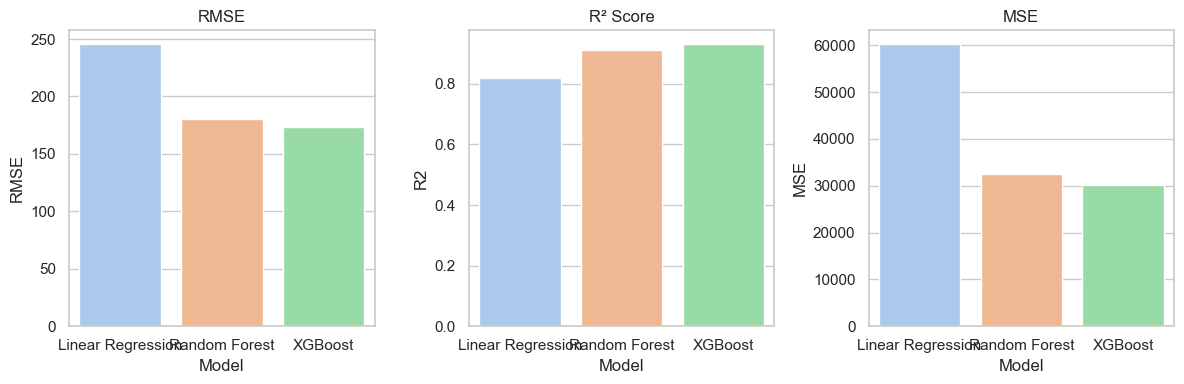

In [79]:
# Sample model evaluation data
data = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [245.3, 180.1, 173.5],
    'R2': [0.82, 0.91, 0.93],
    'MSE': [60184.09, 32436.01, 30099.25]
})
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

# RMSE
plt.subplot(1, 3, 1)
sns.barplot(data=data, x='Model', y='RMSE', hue='Model', dodge=False, palette="pastel")
plt.title('RMSE')

# R2
plt.subplot(1, 3, 2)
sns.barplot(data=data, x='Model', y='R2', hue='Model', dodge=False, palette="pastel")
plt.title('R² Score')

plt.tight_layout()
plt.show()

#### Actual vs Predicted Prices visualization

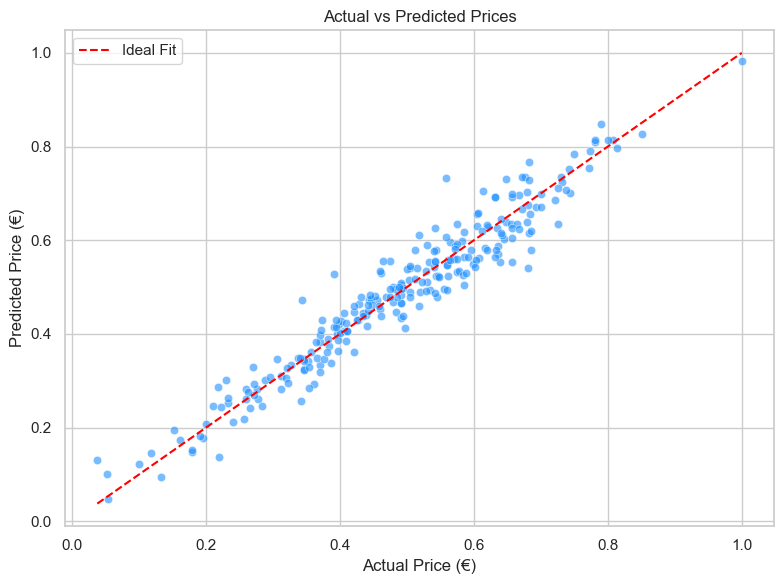

In [72]:
# Example: Replace these with your actual variables
# y_test: Actual prices
# y_pred: Predicted prices from the best model (e.g., XGBoost)
# Assuming you've already split your data and made predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="dodgerblue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()